Librerias

In [1]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Lectura Dataset

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

**Filas y Columnas**

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


**Metrica del dataset**

In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

**Tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

**Descripción de las columnas**

- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


### Filtrado inicial del Dataset

In [9]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]].head()

place_l2 place_l3 property_currency property_type operation
25  Capital Federal      NaN               USD          Casa     Venta
42  Capital Federal     Boca               USD  Departamento     Venta
43  Capital Federal     Boca               USD  Departamento     Venta
49  Capital Federal     Once               USD  Departamento     Venta
51  Capital Federal    Boedo               USD            PH     Venta

#### Tipos de variable

In [10]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

**Separacion en Train y Test**

Separamos el dataset.

Datos de entrenamiento = 80%

Datos de Testing = 20%

Con el 80% entrenaremos a los modelos y con el 20% testearemos que los modelos estén funcionando como se espera.

Realizamos la separación antes de comenzar a trabajar con los datos para que durante la etapa de entrenamiento no se conozcan los mismo ya que luego se usarán para testear y así se podrá predecir de forma adecuada.

In [11]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

In [1]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

NameError: name 'ds_train' is not defined

#### Variables Cuantitativas: medidas de resumen

In [15]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74554.000000       66605.000000            71520.000000   
mean              2.825026           2.017296              112.407424   
std               1.419905           1.134571             1087.726153   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          70.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72702.000000  72382.000000  72382.000000   
mean                       90.080892    -34.591482    -58.450039   
std                      1106.696040      0.189418      0.296032   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.615902    -58.466524   
median                     58.000000    -34.595747    -58.439058   
quartile 3                 89.000000    -34.577367    -58.408882   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.267885e+05  
std           3.119421e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.440000e+05  
quartile 3    2.380000e+05  
max           1.200000e+07  
mode          1.100000e+05

#### Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.


In [16]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

#### Análisis gráfico de las distribuciones de las variables

**Distribución de fechas**

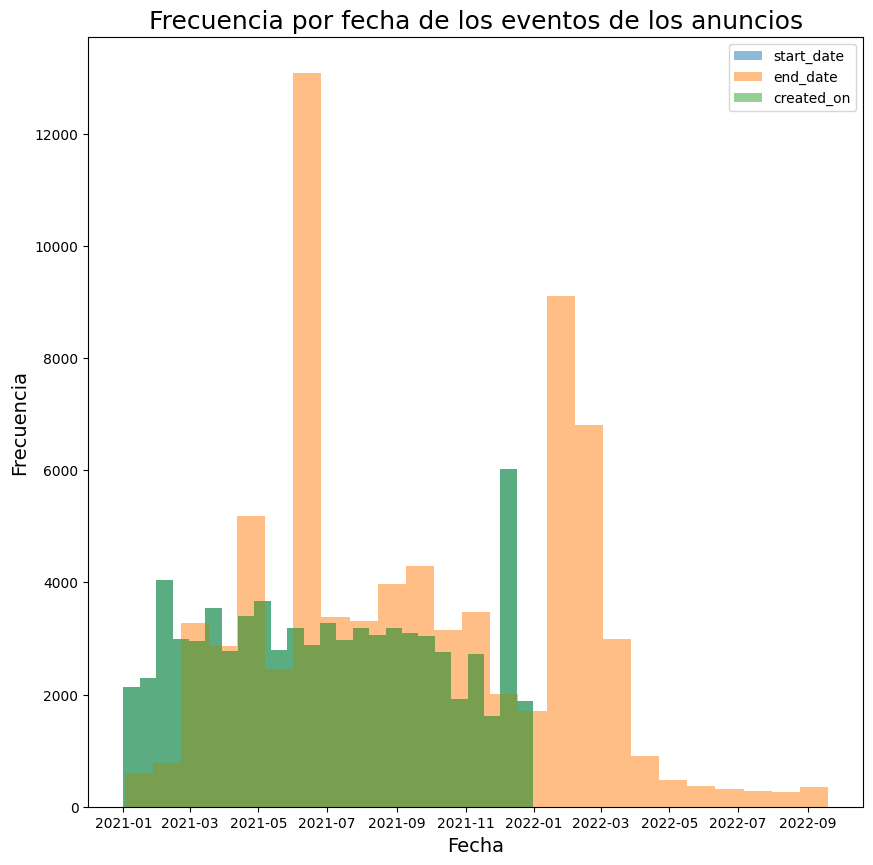

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')

**Distribución de barrios**

In [18]:
top25 = ds_train['place_l3'].value_counts().head(25)

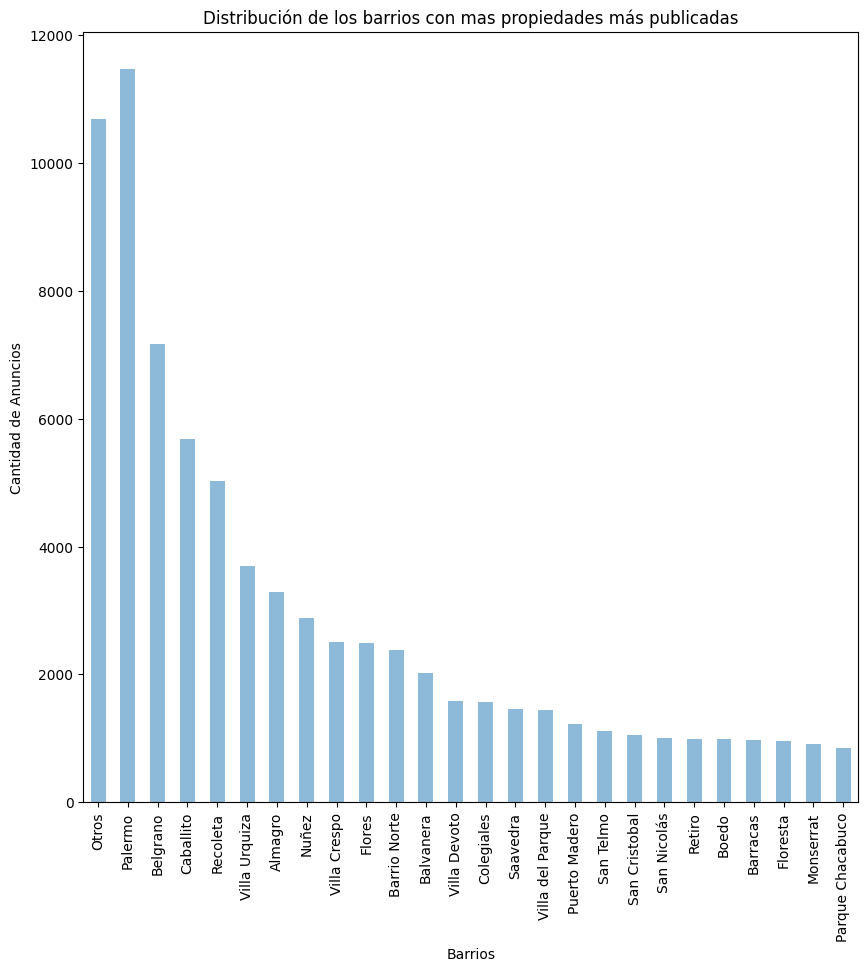

In [19]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

**Distribución de tipos de propiedad**

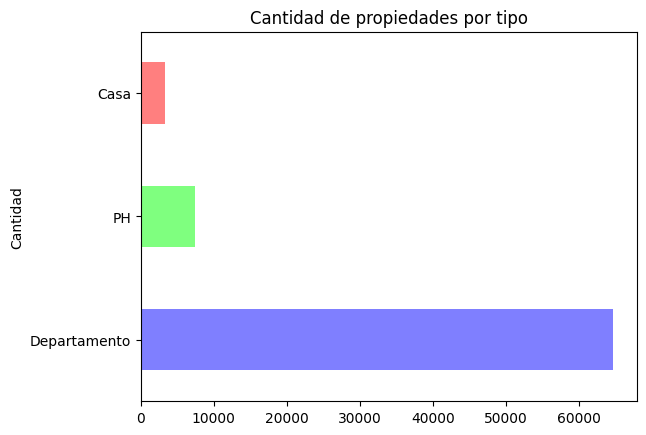

In [20]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

**Distribución de latitud y longitud**

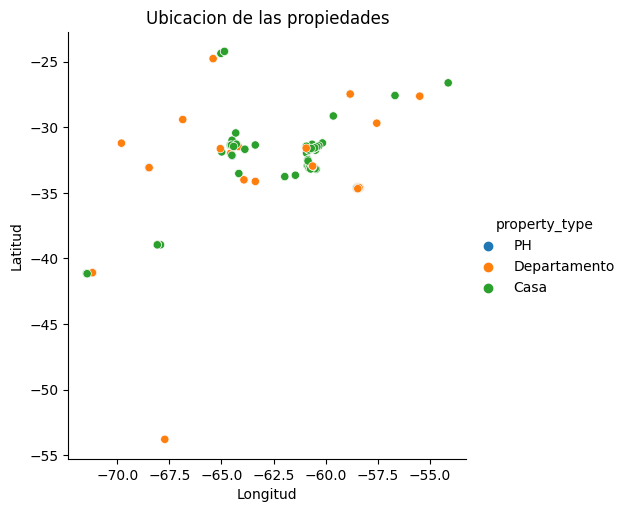

In [21]:

sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

**Distribución de habitaciones y baños**

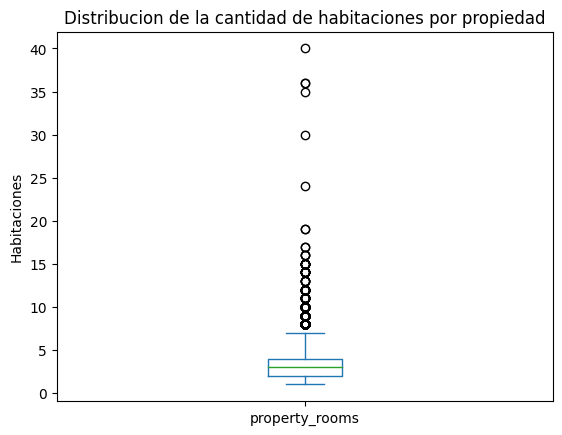

In [22]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

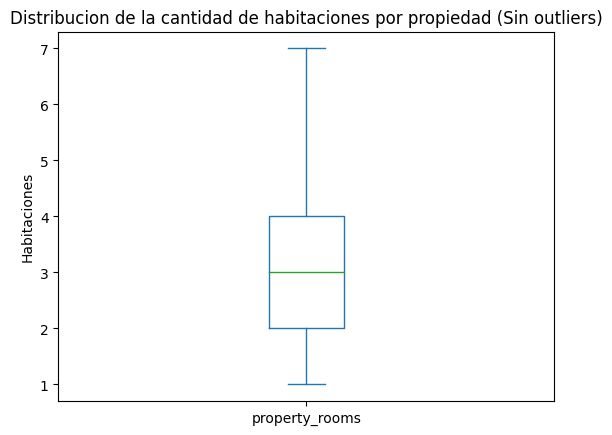

In [23]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

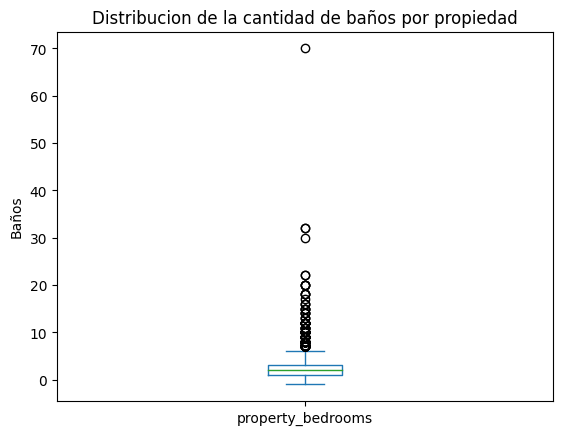

In [24]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")


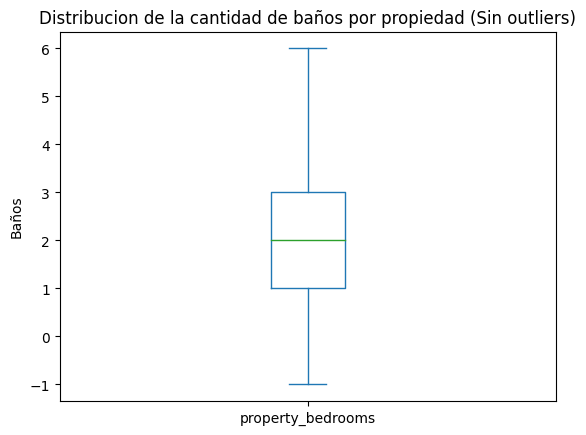

In [25]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

**Distribución de precio**

In [26]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 144000.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

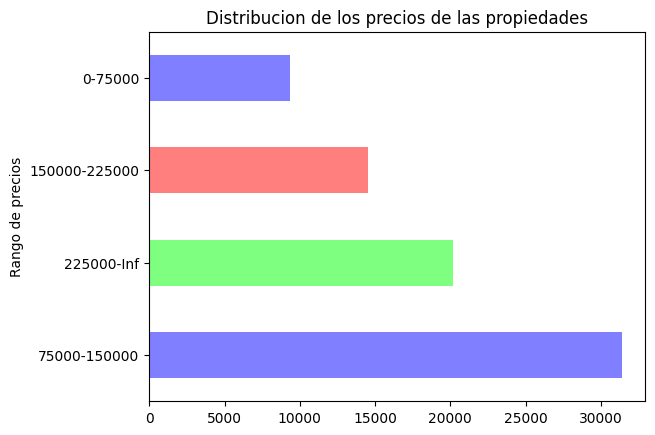

In [27]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

**Distribución de superficie total y cubierta**

<AxesSubplot: >

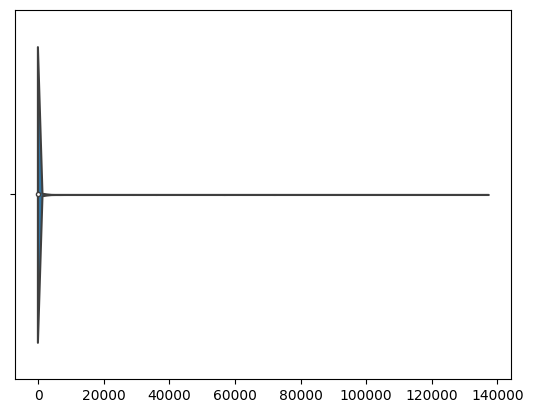

In [28]:
sns.violinplot(ds_train.property_surface_total.values)

<AxesSubplot: >

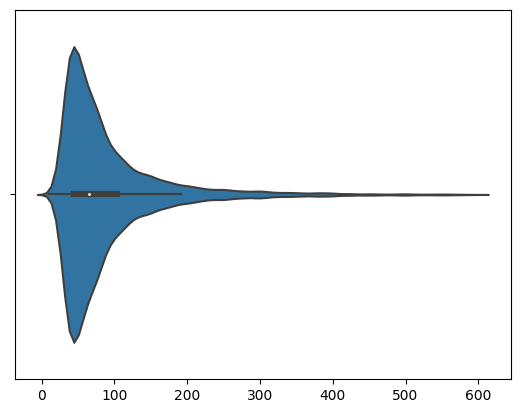

In [29]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

<AxesSubplot: >

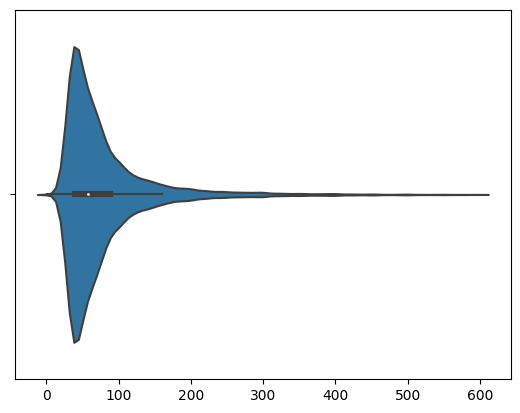

In [30]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

#### Correlación entre variables

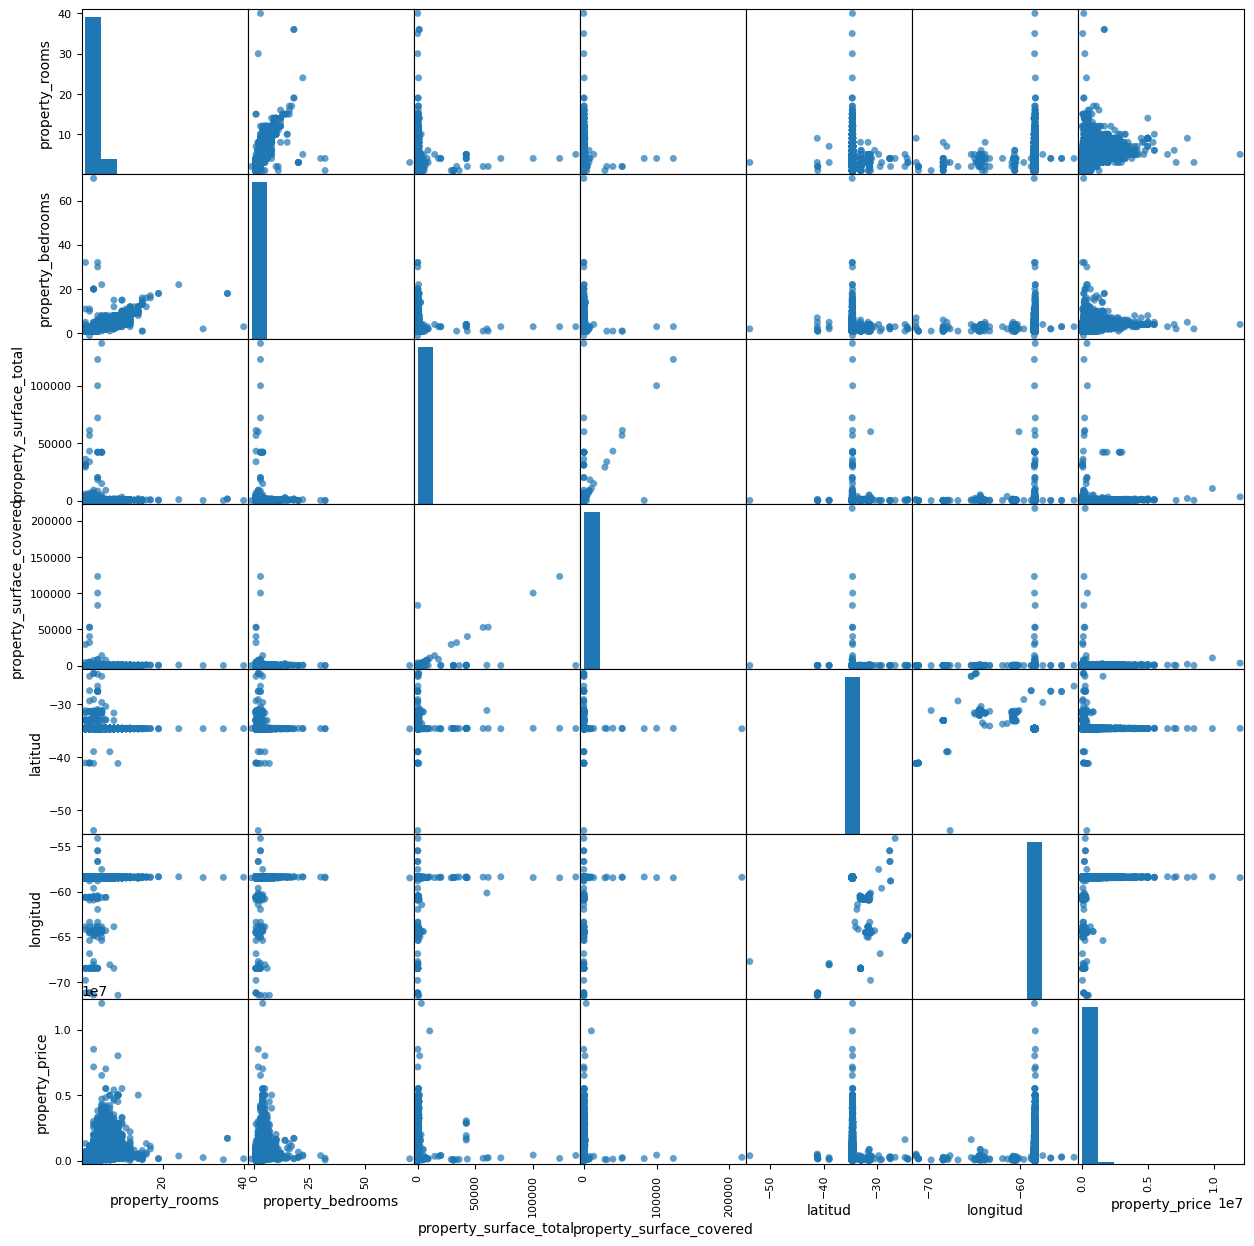

In [31]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [32]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.861551   
property_bedrooms               0.861551           1.000000   
property_surface_total          0.062513           0.062508   
property_surface_covered        0.069074           0.067181   
latitud                         0.005646           0.001876   
longitud                       -0.008955          -0.009629   
property_price                  0.502919           0.422784   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.062513                  0.069074   
property_bedrooms                       0.062508                  0.067181   
property_surface_total                  1.000000                  0.606832   
property_surface_covered                0.606832                  1.000000   
latitud                                 0.025139                  0.002137   
longitud                               -0.015049                 -0.001156   
property_price                          0.085188                  0.052647   

                           latitud  longitud  property_price  
property_rooms            0.005646 -0.008955        0.502919  
property_bedrooms         0.001876 -0.009629        0.422784  
property_surface_total    0.025139 -0.015049        0.085188  
property_surface_covered  0.002137 -0.001156        0.052647  
latitud                   1.000000 -0.208092        0.017102  
longitud                 -0.208092  1.000000        0.022801  
property_price            0.017102  0.022801        1.000000

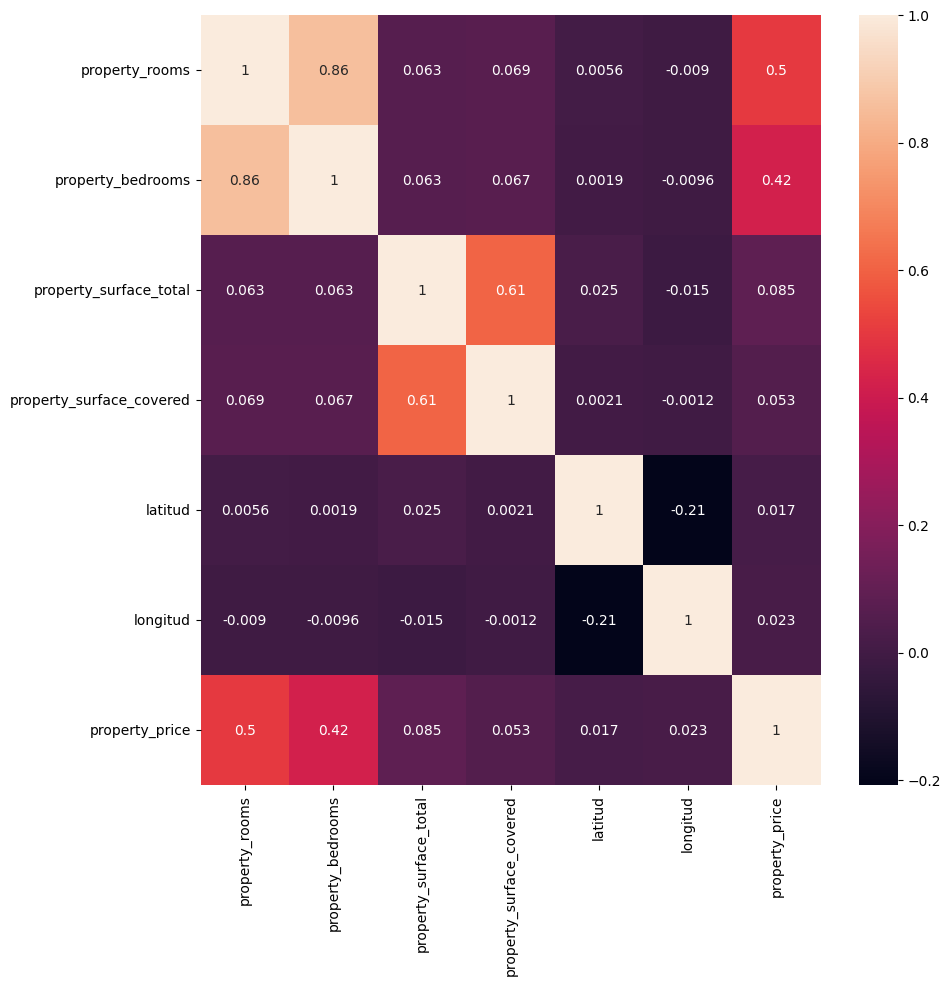

In [33]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

In [34]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.86
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.5
Entre property_surface_total y property_surface_covered:0.61
Entre longitud y latitud:-0.21


### Análisis de valores faltantes

#### Porcentaje de valores faltantes por columna

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       4.001379
longitud                      4.001379
place_l2                      0.000000
place_l3                      0.435019
place_l4                     96.149816
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.120705
property_bedrooms            11.663285
property_surface_total        5.144631
property_surface_covered      3.576971
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


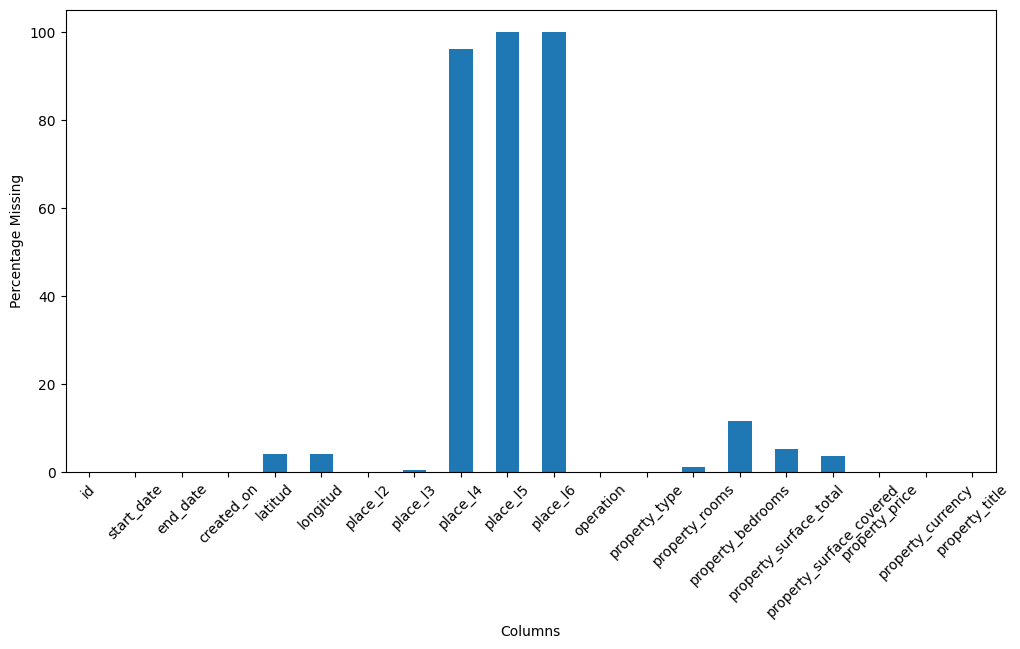

In [35]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

#### Porcentaje de datos faltantes por fila

<AxesSubplot: >

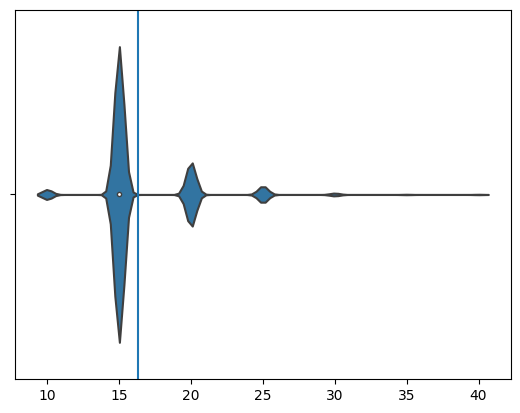

In [36]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

In [37]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       4.001379
longitud                      4.001379
place_l2                      0.000000
place_l3                      0.435019
place_l4                     96.149816
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.120705
property_bedrooms            11.663285
property_surface_total        5.144631
property_surface_covered      3.576971
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


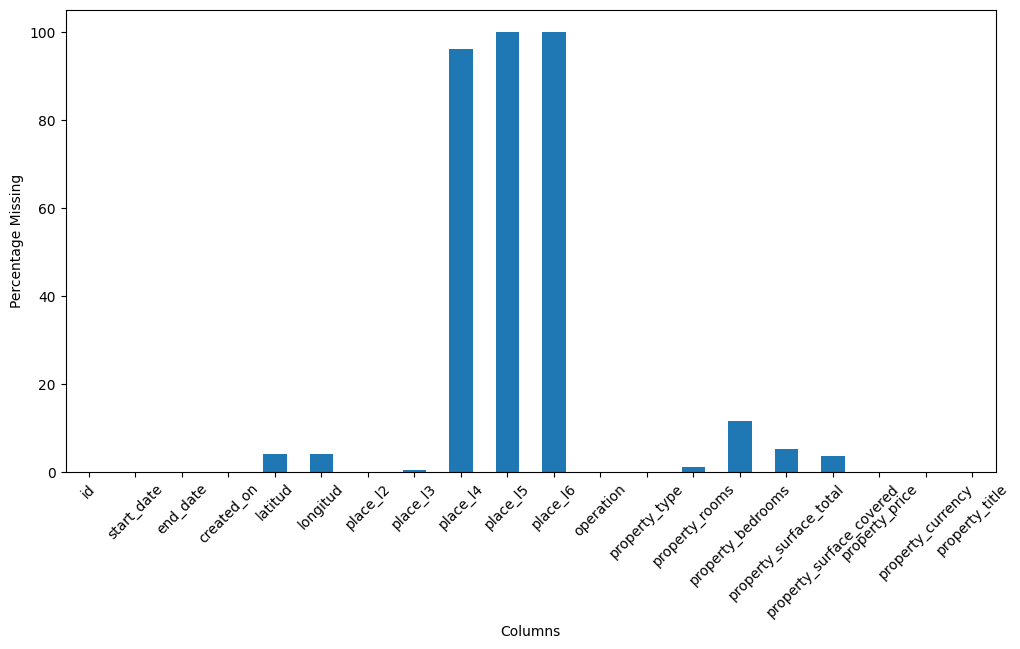

In [38]:
plot_missing_by_column(ds_train)

In [39]:
## Train

ds_train = ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

## Test
ds_test = ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

### Reparacion de datos faltantes

**Pre Imputacion de latitud y longitud**

latitud    4.001379
dtype: float64


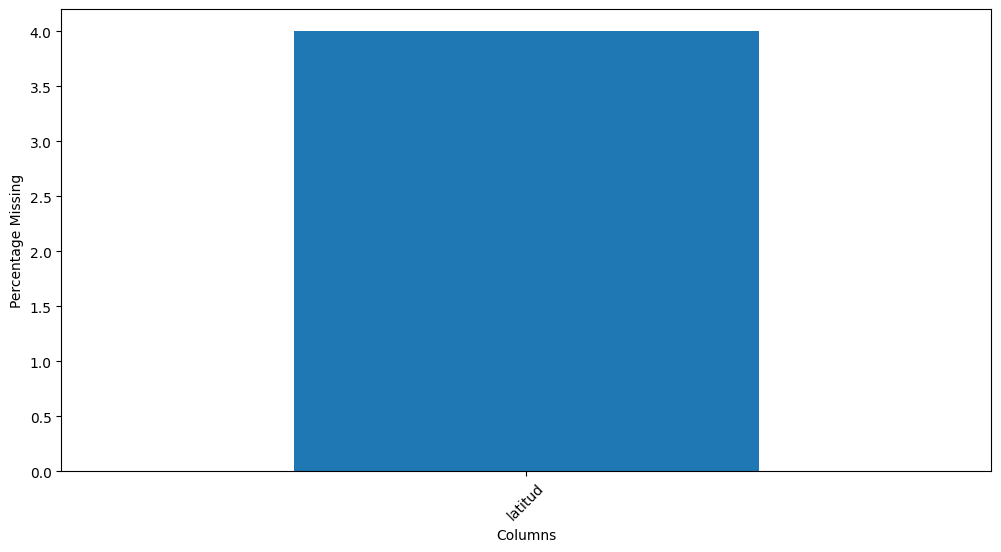

In [40]:
plot_missing_by_column(ds_train[['latitud']])

longitud    4.001379
dtype: float64


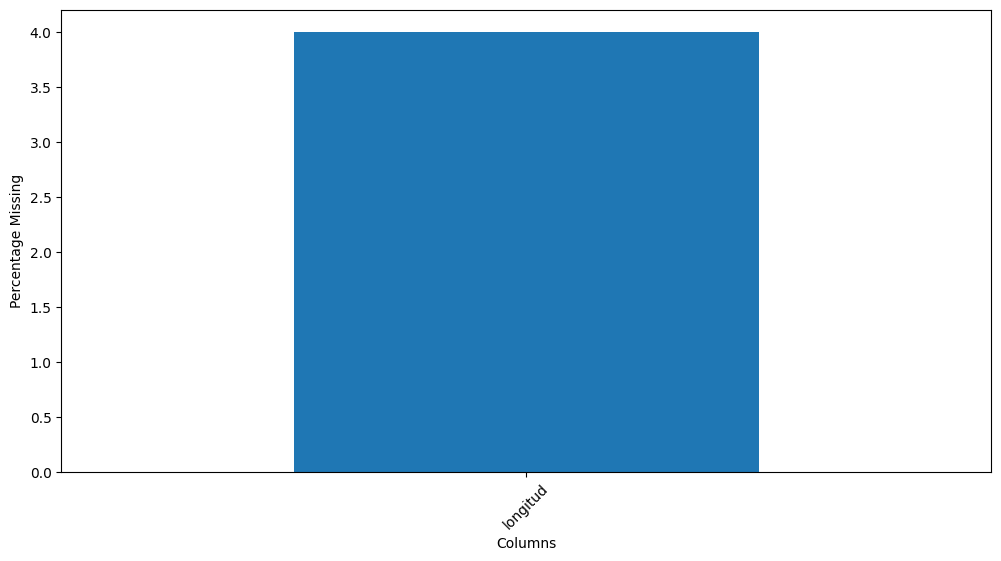

In [41]:
plot_missing_by_column(ds_train[['longitud']])

In [42]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [43]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [44]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.375%
Los datos faltantes en la columna place_l3 para test representan el 5.33%


In [45]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

In [46]:
ds_train[ds_train.latitud.isna()]

id start_date                      end_date  \
335089  WAiIsbKUbeHfLcMXlqdRSw== 2021-07-21 2021-10-03 18:04:43.254875588   
221835  cQOhFHR/RFEu7RjROsN4Rw== 2021-06-30 2021-09-12 18:04:43.254875588   
154305  fHbS9F2VO0veJsrs92H+aA== 2021-02-03 2021-11-04 00:00:00.000000000   
265868  ZjdPr6PFzWhUf8R9DKpAsg== 2021-09-02 2021-09-08 00:00:00.000000000   
176947  HfMK9hfLadGV1BfCX6KK1A== 2021-03-23 2021-06-05 00:00:00.000000000   
...                          ...        ...                           ...   
80199   26wRmFOoBmdfgg/mhXcV5A== 2021-08-17 2021-08-31 00:00:00.000000000   
151716  +qSJjZYy7p+mobIddB6WNA== 2021-08-05 2021-11-04 00:00:00.000000000   
364007  49YfRYIx481tyM+DHtFlRQ== 2021-04-10 2021-04-14 00:00:00.000000000   
173649  +SQUH85tiajEW7WKMsBjZQ== 2021-05-11 2021-11-04 00:00:00.000000000   
19426   0q0FwIHkex8jywo1x1Q6mA== 2021-01-27 2021-01-29 00:00:00.000000000   

        latitud  longitud place_l3 property_type  property_rooms  \
335089      NaN       NaN      NaN          Casa             NaN   
221835      NaN       NaN      NaN          Casa             NaN   
154305      NaN       NaN      NaN  Departamento             1.0   
265868      NaN       NaN      NaN  Departamento             3.0   
176947      NaN       NaN      NaN          Casa             NaN   
...         ...       ...      ...           ...             ...   
80199       NaN       NaN      NaN  Departamento             2.0   
151716      NaN       NaN      NaN  Departamento             2.0   
364007      NaN       NaN      NaN          Casa             NaN   
173649      NaN       NaN      NaN  Departamento             1.0   
19426       NaN       NaN      NaN  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
335089                5.0                   282.0                     282.0   
221835                8.0                   750.0                     450.0   
154305                NaN                     NaN                      32.0   
265868                2.0                    73.0                      52.0   
176947                4.0                     NaN                     150.0   
...                   ...                     ...                       ...   
80199                 1.0                     NaN                      38.0   
151716                NaN                     NaN                      48.0   
364007                4.0                     NaN                     167.0   
173649                NaN                     NaN                      35.0   
19426                 3.0                   220.0                     200.0   

        property_price                                     property_title  
335089        250000.0              HERMOSA CASA CON PISCINA Y PARQUE !!!  
221835       1200000.0  BAJO EL PRECIO!! Casa de lujo en El Chorro - M...  
154305         82000.0  Departamento en Venta CABA / Buenos Aires (D03...  
265868         87500.0  Departamento de 73 m2 - 3 ambientes en Alquile...  
176947        195000.0  Arroyo Dulce  Vta Casa 200m2 cub. Cochera. Rut...  
...                ...                                                ...  
80199         120000.0                     Departamento - Capital Federal  
151716         89000.0  Departamento en Venta Caba / Buenos Aires (B11...  
364007        175000.0  Venta Casa en Barrio Parque Sakura Zona Exalta...  
173649         90000.0  Departamento en Venta Caba / Buenos Aires (D03...  
19426         380000.0  Amplio loft en venta con doble vista al agua e...  

[132 rows x 13 columns]

In [47]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
131180  AbLM47C1NMTSdKtNZqX1Fw==        NaT      NaT      NaN       NaN   
71492   Ur3JttwFZloGubSEDsarDg==        NaT      NaT      NaN       NaN   
25      CyZu6IaZgmQYGk8jmPajCg==        NaT      NaT      NaN       NaN   
143125  pg20DD3zV1p2ACa+Pvangg==        NaT      NaT      NaN       NaN   
384800  5aGy5t5NzOFfGjeiWF0/uw==        NaT      NaT      NaN       NaN   
45963   ZMETeO0JxjkcfJd8S+gZOg==        NaT      NaT      NaN       NaN   
181520  GM7E6ngDRinluTkRR97Hqw==        NaT      NaT      NaN       NaN   
341285  fH/+4asrLhpVCY1KxLwFKQ==        NaT      NaT      NaN       NaN   
286971  Ofh+oK3y43KJLYsPg0uj4w==        NaT      NaT      NaN       NaN   
336741  9axBqXrySzGV8sAeS4cLtQ==        NaT      NaT      NaN       NaN   
97667   B7DF6p55ymZ7udgcXdgv2g==        NaT      NaT      NaN       NaN   
267339  +f7X2HemIFMsJr2dJaqCVA==        NaT      NaT      NaN       NaN   
44904   FMuIW0cVEZuu00r4iMZGlw==        NaT      NaT      NaN       NaN   
458696  UxrImoZVU0nEah53uM/NSg==        NaT      NaT      NaN       NaN   
309867  2oiyp4YLGap4pyz/JrKC3A==        NaT      NaT      NaN       NaN   
441455  MQMDesdhkobsc2Dz5D5AZQ==        NaT      NaT      NaN       NaN   
114489  m840XwQvdPOmo1l4HKF73Q==        NaT      NaT      NaN       NaN   
378461  PZA/i+ktmeRpM25oDPqW5Q==        NaT      NaT      NaN       NaN   
101456  pYxy/6HZGMBjHgbngmG70Q==        NaT      NaT      NaN       NaN   
6699    v+sxjFL/W8jKIb6kZ/utHQ==        NaT      NaT      NaN       NaN   
223287  ANBlWDLQarFIoRKCdED4SQ==        NaT      NaT      NaN       NaN   
248747  Lrs8VtszCjsi0+FEhk7xOQ==        NaT      NaT      NaN       NaN   
343265  ivCufxbxoTGNCsW8IF72Iw==        NaT      NaT      NaN       NaN   
114493  7xfS6WRwwvyB0rgPkEgI1A==        NaT      NaT      NaN       NaN   
148947  TV/WQawW0ls6INCB6bqfnQ==        NaT      NaT      NaN       NaN   
100679  bazSV9fw9UcXJh6Xkx9IOg==        NaT      NaT      NaN       NaN   
3099    cLeo0+I+Zt0/4dwt9KeFlg==        NaT      NaT      NaN       NaN   
292979  B7n7Xn2Vqf49Ff+AG0T3Jw==        NaT      NaT      NaN       NaN   
57098   k8oVn7UMh5c31oMy3VQMJQ==        NaT      NaT      NaN       NaN   
393092  9EiXFu6SwZ3s0e837avtGQ==        NaT      NaT      NaN       NaN   
385332  ih9LGBbNdcMTUZDASVl5iw==        NaT      NaT      NaN       NaN   
31871   BKX/oZw0f3iowrtswwdbMA==        NaT      NaT      NaN       NaN   
458616  aUqza6tHXiZJXBqZ4bpS9Q==        NaT      NaT      NaN       NaN   
159524  PHefnaqylyBP8DwDutBIIQ==        NaT      NaT      NaN       NaN   
309009  lueG6ZNaiqX2qrMCJHFeyg==        NaT      NaT      NaN       NaN   
134800  523CC8zAk8rc05AJBl1IaA==        NaT      NaT      NaN       NaN   
218048  vRA/0y8xkAUweY9h1T7EzA==        NaT      NaT      NaN       NaN   
459187  eKBe4k1ocBLyz6ntXQfPiQ==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
131180      NaN  Departamento             3.0                2.0   
71492       NaN  Departamento             NaN                NaN   
25          NaN          Casa             4.0                3.0   
143125      NaN  Departamento             2.0                NaN   
384800      NaN            PH             4.0                NaN   
45963       NaN  Departamento             1.0                NaN   
181520      NaN  Departamento             2.0                1.0   
341285      NaN  Departamento             4.0                NaN   
286971      NaN  Departamento             2.0                NaN   
336741      NaN  Departamento             3.0                2.0   
97667       NaN  Departamento             1.0                1.0   
267339      NaN          Casa             4.0                2.0   
44904       NaN  Departamento             2.0                NaN   
458696      NaN          Casa             NaN                2.0   
309867      NaN  Departamento             2.0                NaN   
441455      NaN 

In [48]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.002%


In [49]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

**Post Imputacion de latitud y longitud**

latitud    0.0
dtype: float64


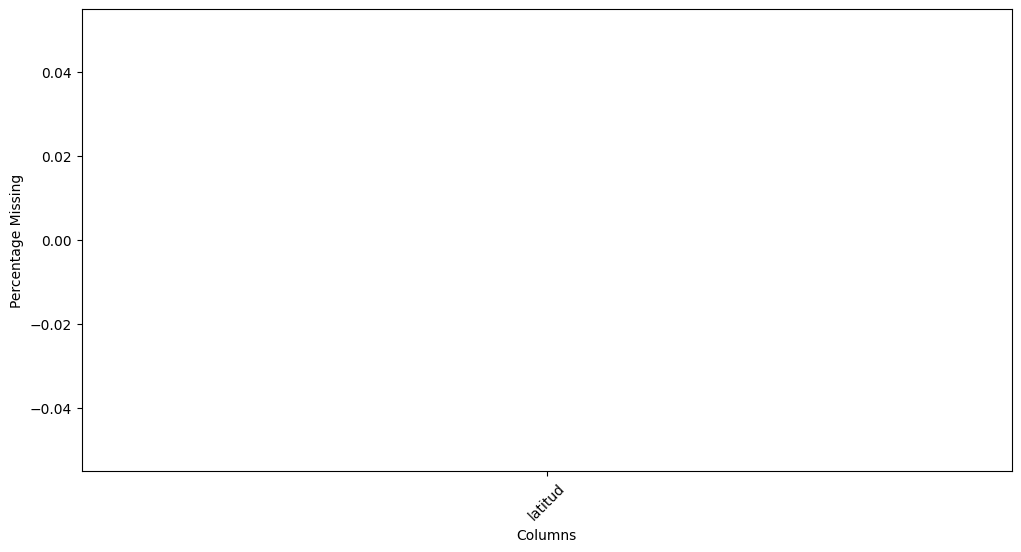

In [50]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


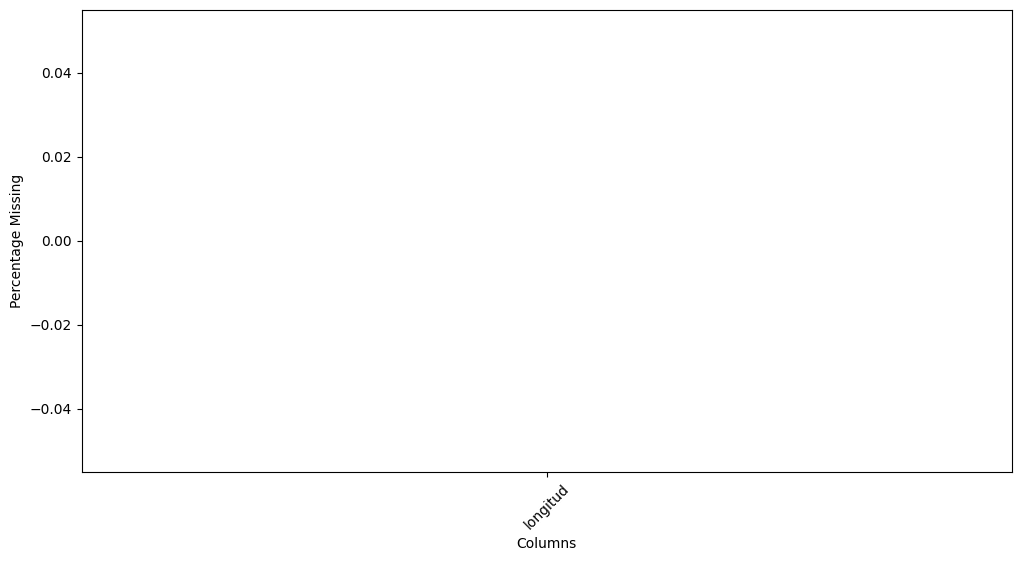

In [51]:
plot_missing_by_column(ds_train[['longitud']])

**Pre imputación de ambientes**

property_rooms    1.092112
dtype: float64


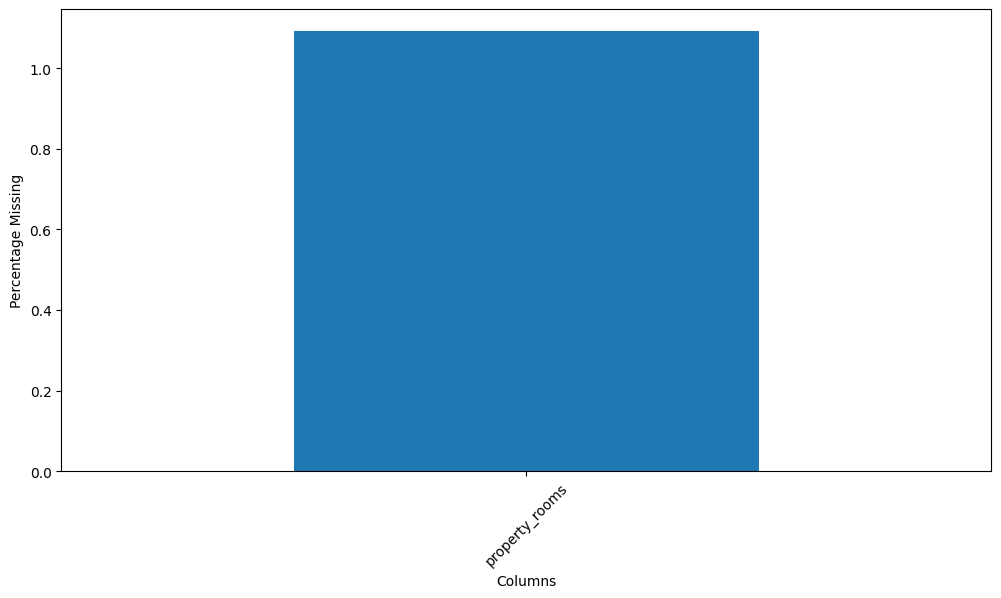

In [52]:
plot_missing_by_column(ds_train[['property_rooms']])

**Reparacion de ambientes faltantes en base al titulo de la propiedad**

In [53]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")

In [54]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 822
cantidad de ambientes faltantes post reparacion: 666
cantidad inicial de ambientes a reparar: 192
cantidad de ambientes faltantes post reparacion: 183


**Post Imputacion de ambientes**

property_rooms    0.88485
dtype: float64


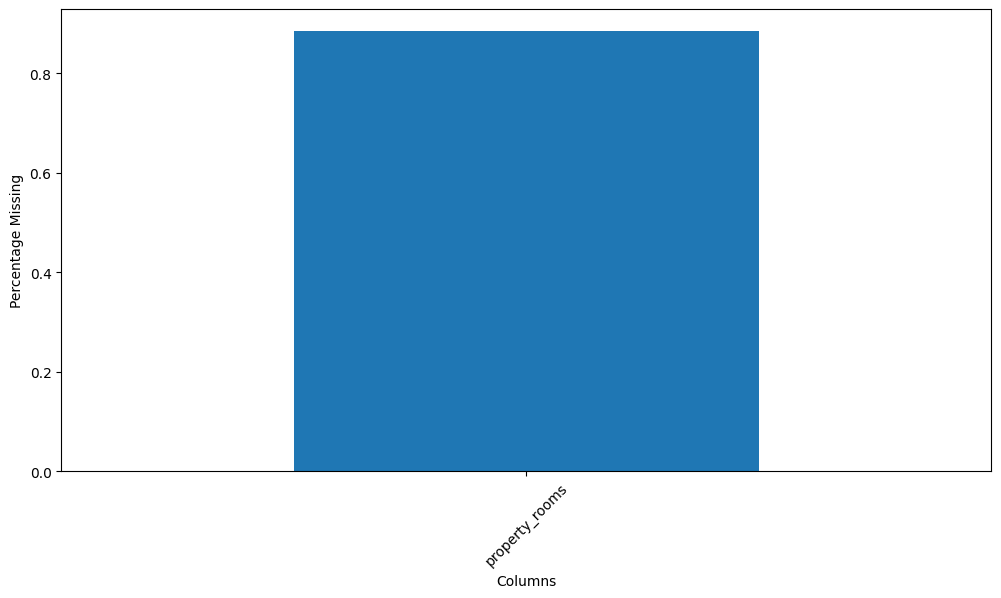

In [55]:
plot_missing_by_column(ds_train[['property_rooms']])

In [56]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


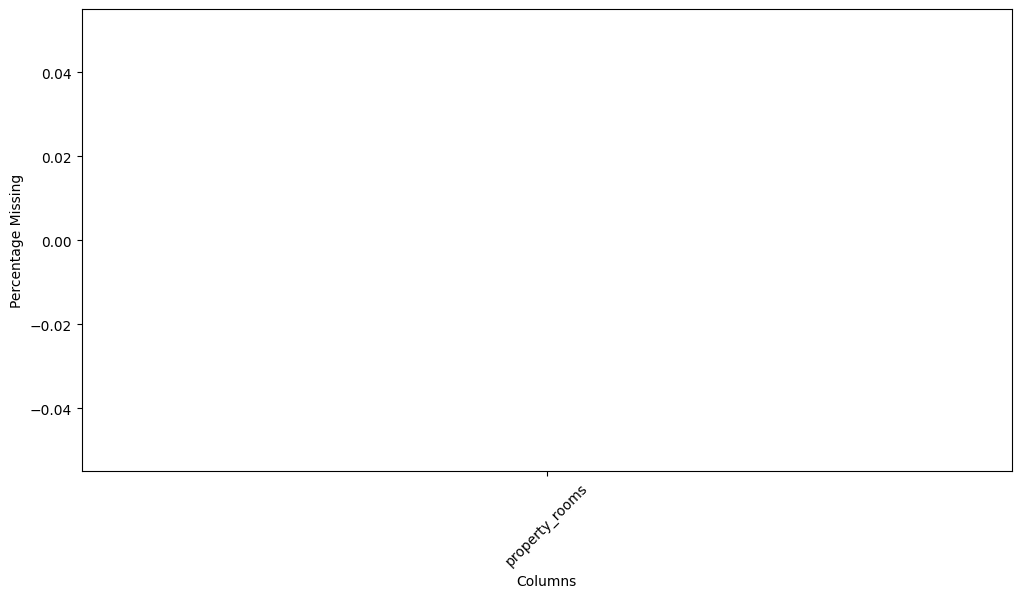

In [57]:
plot_missing_by_column(ds_train[['property_rooms']])

**Pre Imputacion de Habitaciones**

property_bedrooms    11.293414
dtype: float64


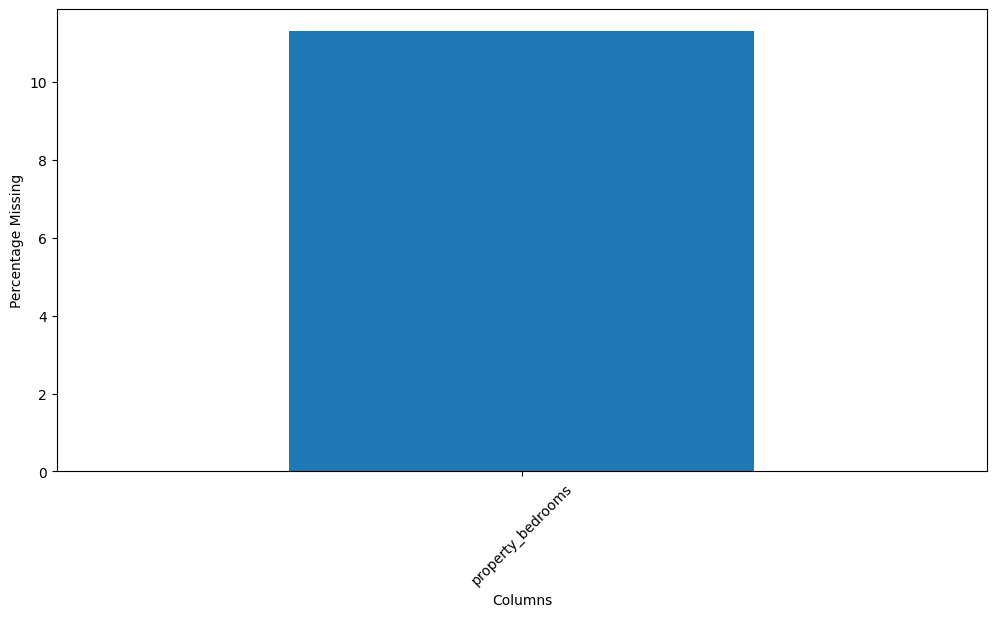

In [58]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Reparacion de habitaciones faltantes en base a los ambientes**

In [59]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

El total de habitaciones en train es: 74601
El total de habitaciones invalidas es: 132. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18629
El total de habitaciones invalidas es: 30. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
238659  1qeAdZb/VEw1d35Gowzi3g==        NaT      NaT -34.612685 -58.362714   
126403  ETzg09MPRQDliI9p8PzeBg==        NaT      NaT -34.564988 -58.444710   
2516    uKy3ZC5YQ9kPZ1ztj7CKjw==        NaT      NaT -34.557573 -58.459926   
214047  iiluCSGPoNS2rL+viZL6Dw==        NaT      NaT -34.595985 -58.401429   
150143  iHGPXAOMtPXPc++zjbiYzA==        NaT      NaT -34.605254 -58.468938   
115480  mR0CScRgrmuvUAKSFjWQHA==        NaT      NaT -34.613261 -58.361513   
29406   OOz88YCCX3+F85n3z/yoiQ==        NaT      NaT -34.573955 -58.469930   
113953  xluQO3TsDjTRtN9foSO6Jw==        NaT      NaT -34.593316 -58.377201   
127231  wn7j0YSM4rEE0Tfl6S2lIQ==        NaT      NaT -34.618449 -58.505422   
229212  azlGDc44w5UKu1Ft0aWdLA==        NaT      NaT -34.623053 -58.447006   
100795  gI3pg7SufgrPUQRWeeNgkQ==        NaT      NaT -34.565974 -58.433832   
100807  3u2SeeteiBPk/c3nU9WQnA==        NaT      NaT -34.565974 -58.433832   
63013   q5mE4qv6OxYNWlMis+Mwig==        NaT      NaT -34.650211 -58.503437   
323765  axwZ6U4+1RIdVT+eKpht9w==        NaT      NaT -34.605374 -58.365343   
137659  mAzAqXdmAZYrERB6k3F51w==        NaT      NaT -34.585134 -58.394394   
258718  k8B5YFFJR/qAum7Vo/NTlg==        NaT      NaT -34.603809 -58.461512   
79035   +sZnkzGN5t45GzxOtQ4Svg==        NaT      NaT -34.581842 -58.424591   
236624  wNjDuMJwjrMgsHHpZdNidA==        NaT      NaT -34.626670 -58.439150   
442558  LcFV+buICyzuweftEQ0jUw==        NaT      NaT -34.594547 -58.384367   
385580  48pQafgstnUSZLKK3E9u7A==        NaT      NaT -34.562502 -58.453964   
115166  +m3+nsAwQ9Us0fjB6pJ8Mg==        NaT      NaT -34.620586 -58.439740   
443898  oj7pM0UnMdxUrnbcWlN6DQ==        NaT      NaT -34.562809 -58.476758   
238661  f0A1+TKS8OCYI9kfzIZ3MQ==        NaT      NaT -34.621530 -58.361752   
150144  OwNpobSoNV+5PZJqdx/A0Q==        NaT      NaT -34.605254 -58.468938   
389785  27m+gMqYeF33x/dnieQKjw==        NaT      NaT -34.614298 -58.427139   
340427  uP+f4jupr3E/oT2T1TNTkg==        NaT      NaT -34.621660 -58.381734   
389699  /D5DqZYM2nZ/7R9a/Ty+Gw==        NaT      NaT -34.606923 -58.404533   
120845  4tv+arT+v45pAwx5zNpzWQ==        NaT      NaT -34.608618 -58.440001   
399560  qlMqnmUjGt7quE+h6uWNng==        NaT      NaT -34.601997 -58.383625   
307211  uqM9/WXFJkEJnXEQefcpRQ==        NaT      NaT -34.611905 -58.382384   

                place_l3 property_type  property_rooms  property_bedrooms  \
238659     Puerto Madero  Departamento             4.0                6.0   
126403          Belgrano  Departamento             5.0                7.0   
2516            Belgrano  Departamento             1.0                2.0   
214047      Barrio Norte  Departamento             1.0                2.0   
150143          Paternal          Casa             3.0                5.0   
115480     Puerto Madero  Departamento             3.0                4.0   
29406           Belgrano          Casa             4.0                5.0   
113953          Recoleta  Departamento             5.0                6.0   
127231      Monte Castro  Departamento             1.0                2.0   
229212         Caballito  Departamento             4.0                5.0   
100795           Palermo  Departamento             3.0                4.0   
100807           Palermo  Departamento             3.0                4.0   
63013          Mataderos  Departamento             1.0                2.0   
323765         San Telmo  Departamento             1.0                2.0   
137659          Recoleta  Departamento             3.0                4.0   
258718  Villa Pueyrredón            PH             3.0                6.0   
79035            Palermo  Departamento             4.0                5.0   
236624         Caballito          Casa             5.0                6.0   
442558          Recoleta  Departamento             5.0                6.0   
385580          Belgrano  Departamento             4.0                6

In [60]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55746. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13936. Constituyen al 74% de los datos


In [61]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8425
Valor inicial de habitaciones faltantes en el ds de test: 2100


In [62]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [63]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Post Imputacion de habitaciones**

property_bedrooms    0.0
dtype: float64


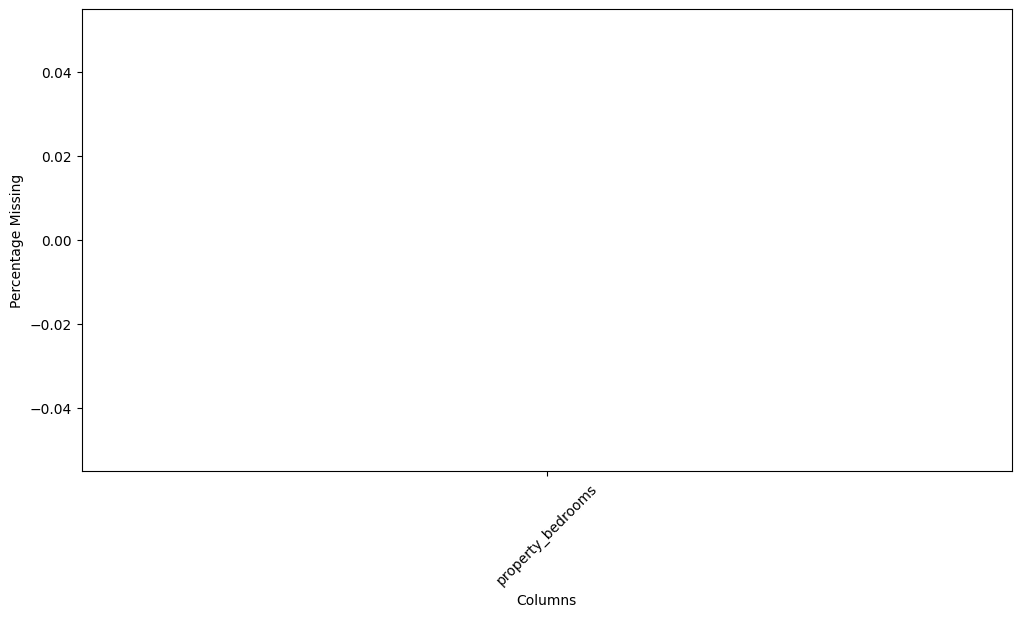

In [64]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Pre Imputación de Superficie total**

property_surface_total    4.919505
dtype: float64


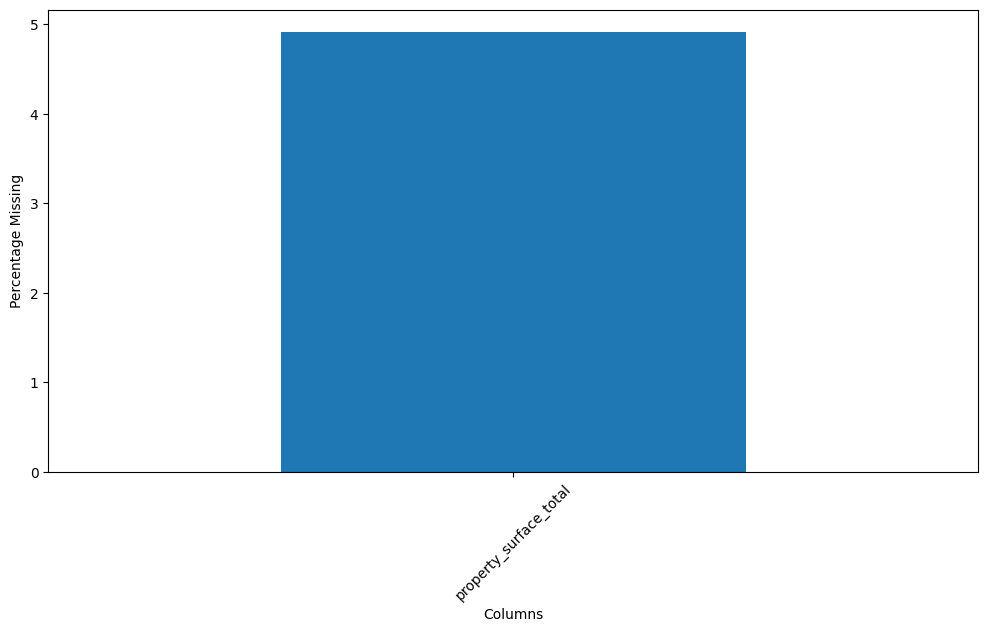

In [65]:
plot_missing_by_column(ds_train[['property_surface_total']])

In [66]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Reparación de datos faltantes en superficie cubierta**

In [67]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

**Post Imputación de Superficie total**

property_surface_total    0.0
dtype: float64


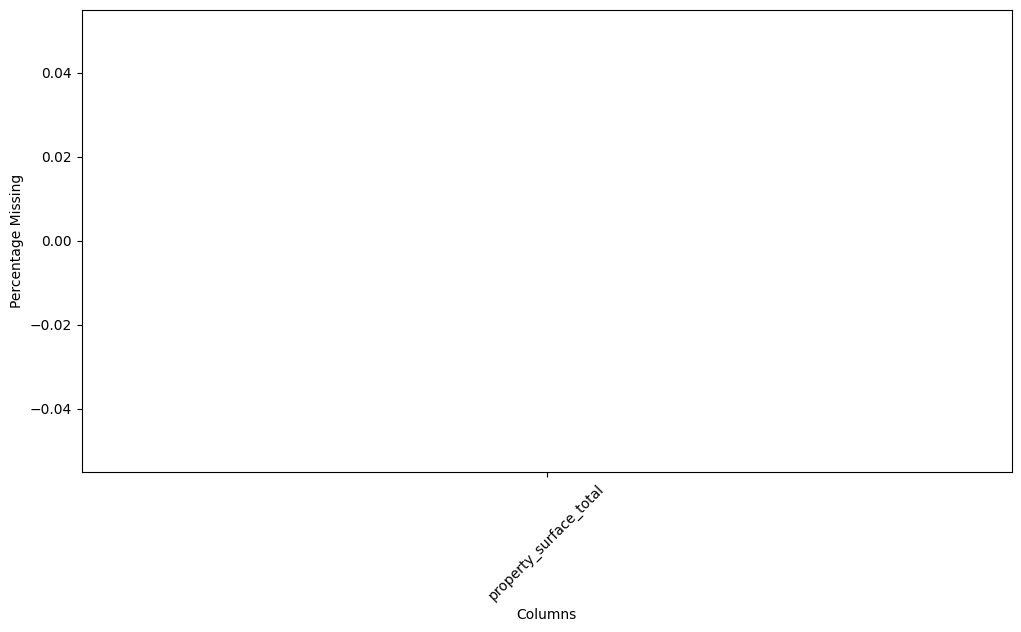

In [68]:
plot_missing_by_column(ds_train[['property_surface_total']])

**Pre Imputación de superficie cubierta**

In [69]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date   end_date    latitud   longitud  \
354335  OtY68BduakKcQqaAGkU7Qw== 2021-11-04 2021-11-12 -34.617285 -58.396332   
79360   IKJCibMOBSL6nYU2+xYz+A== 2021-11-10 2022-01-27 -34.570264 -58.448210   
95129   PbmLqspc4lB1ngdoo8fgRw== 2021-09-24 2021-12-10 -34.603593 -58.376756   
47222   xSKLfa/V7cgILp5gau2yAQ== 2021-04-21 2021-06-05 -34.600040 -58.390166   
384975  STHo8xZ2UqY8MpAPMSV5/w== 2021-02-10 2021-04-23 -34.633812 -58.466715   
...                          ...        ...        ...        ...        ...   
39547   39bAgoKvC3J/CSvURnGaHQ== 2021-07-30 2021-12-24 -34.566536 -58.456862   
122437  oYStaDPzyMbZYt/h3VPIrA== 2021-08-04 2022-06-25 -34.596104 -58.444822   
392469  VhurbPBR6mDRuXbp8demEQ== 2021-10-28 2022-01-27 -34.583473 -58.433905   
432725  RV82gEKm5yqYPTYCGDsEQw== 2021-05-04 2021-06-05 -34.606738 -58.389426   
70148   ktMxvCajVhwVIbsJDNrO2w== 2021-09-23 2021-09-23 -34.595383 -58.380377   

            place_l3 property_type  property_rooms  property_bedrooms  \
354335     Balvanera  Departamento             1.0                1.0   
79360     Colegiales  Departamento             1.0                1.0   
95129    San Nicolás  Departamento             1.0                1.0   
47222   Barrio Norte  Departamento             1.0                1.0   
384975        Flores          Casa             4.0                3.0   
...              ...           ...             ...                ...   
39547       Belgrano  Departamento             4.0                3.0   
122437  Villa Crespo            PH             3.0                2.0   
392469       Palermo  Departamento             2.0                1.0   
432725   San Nicolás            PH             4.0                3.0   
70148       Recoleta  Departamento             7.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
354335                    43.0                       NaN         59800.0   
79360                     26.0                       NaN         75000.0   
95129                     20.0                       NaN         39000.0   
47222                     24.0                       NaN         62000.0   
384975                   150.0                       NaN        120000.0   
...                        ...                       ...             ...   
39547                    130.0                       NaN        425000.0   
122437                    56.0                       NaN        109000.0   
392469                    61.0                       NaN        253267.0   
432725                   137.0                       NaN        218000.0   
70148                    231.0                       NaN        350000.0   

                                           property_title  
354335                           Departamento - Balvanera  
79360   Espectacular Monoambiente en venta en Colegiales!  
95129   Departamento  1 AMB. OFICINA O VIVIENDA - Cent...  
47222                         Departamento - Barrio Norte  
384975                                      Casa - Flores  
...                                                   ...  
39547   Hermoso y amplio Semipiso de 4 ambientes en To...  
122437                        Hermosos PH en Villa Crespo  
392469  Venta - Departamento - Palermo Hollywood - 2 a...  
432725                               PH - Capital Federal  
70148   Piso de gran categoría en Edificio de estilo f...  

[2623 rows x 13 columns]

property_surface_covered    3.516039
dtype: float64


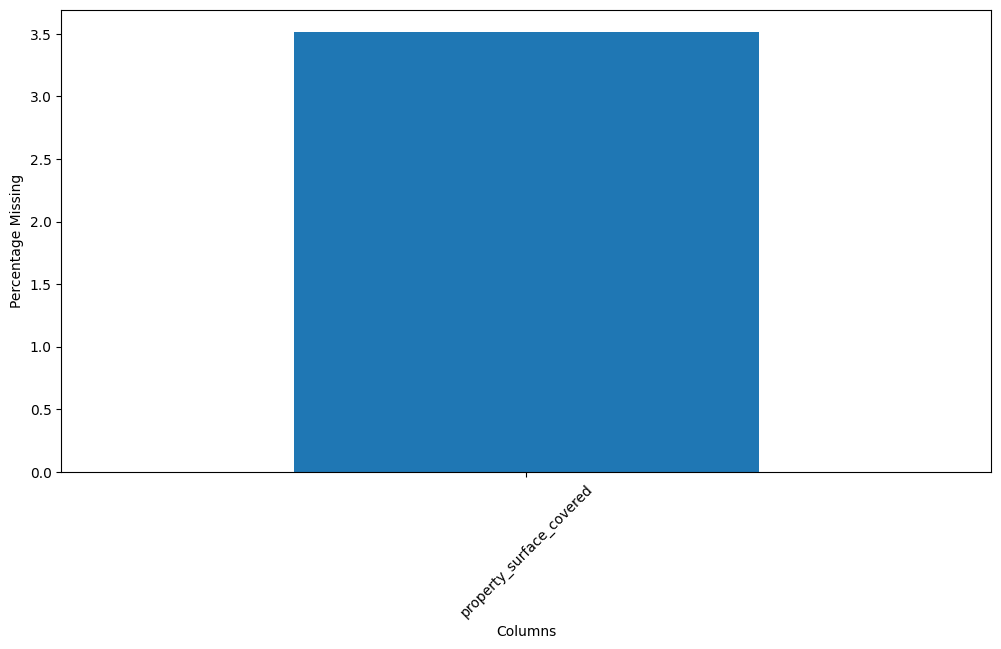

In [70]:
plot_missing_by_column(ds_train[['property_surface_covered']])

**Reparación de datos faltantes en Superficie cubierta**

In [71]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2352
PH               185
Casa              86
Name: property_type, dtype: int64

In [72]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [73]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 271


In [74]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 641


In [75]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

id                          0.00000
start_date                  0.00000
end_date                    0.00000
latitud                     0.00000
longitud                    0.00000
place_l3                    0.20853
property_type               0.00000
property_rooms              0.00000
property_bedrooms           0.00000
property_surface_total      0.00000
property_surface_covered    0.00000
property_price              0.00000
property_title              0.00000
dtype: float64


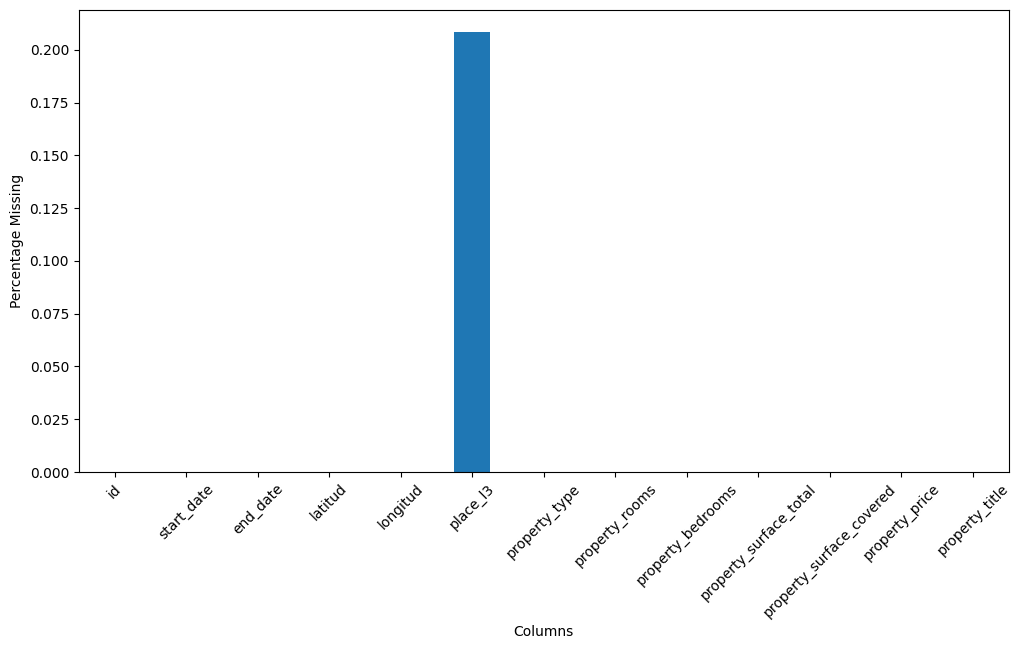

In [76]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

### Analisis de Valores Atipicos

#### Univariados

**Metodo IQR**

In [77]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()

In [78]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max


In [79]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

**Ambientes**

cantidad de datos del ds: 74330
outliers encontrados para los property_rooms: 1181
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


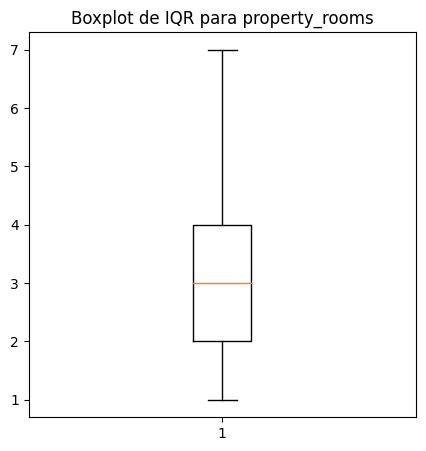

In [80]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

In [81]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 582. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 146. Constituyen al 0% de los datos


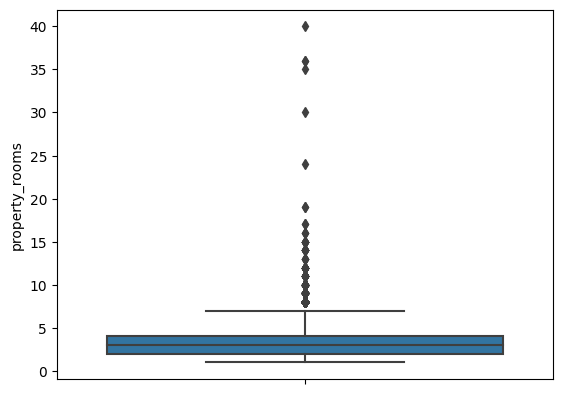

In [82]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

In [83]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


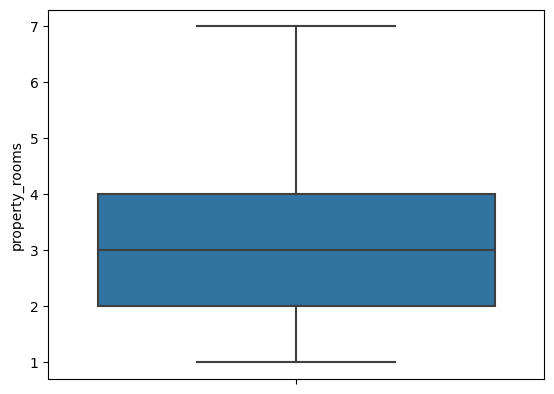

In [84]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

**Habitaciones**

Moderated outliers limits [min: -2.0,max: 6.0]
Severe outliers limits [min: -5.0,max: 9.0]


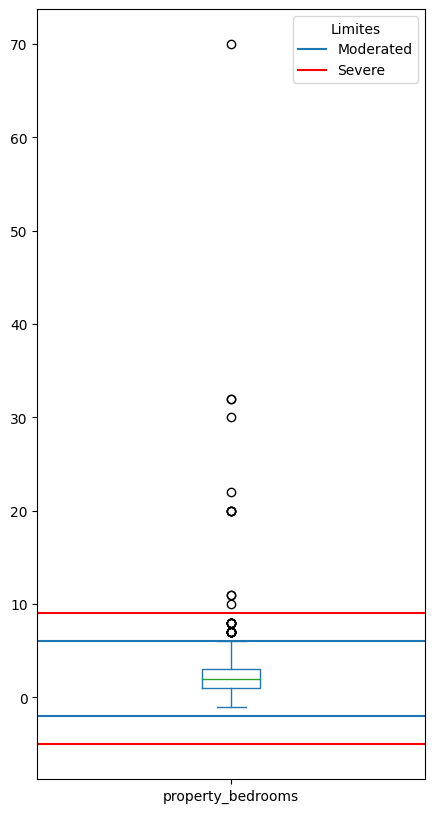

In [85]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73748
outliers encontrados para los property_bedrooms: 140
hay 0% de outliers de property_bedrooms sobre el ds
limit sup: 6.0, limite inf: -2.0


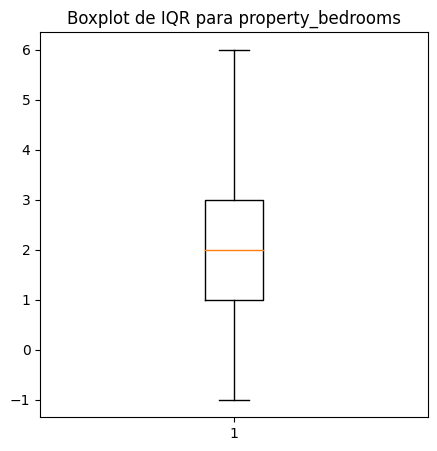

In [86]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [87]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 31. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 3. Constituyen al 0% de los datos


In [88]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


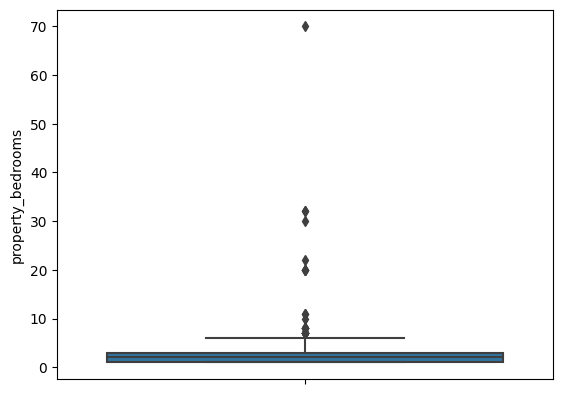

In [89]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

In [90]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_rooms])}")

Ejemplos: 


13

In [91]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 31 registros en train
Se han eliminado: 3 registros en test


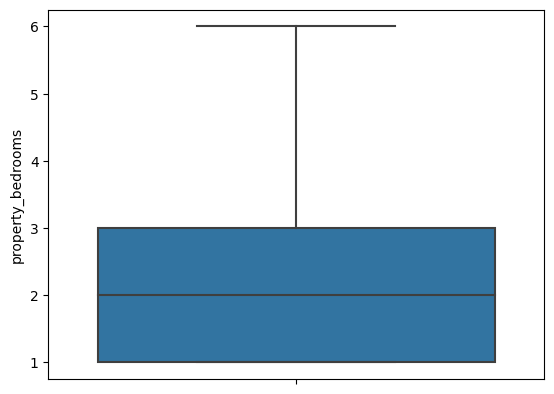

In [92]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

**Superficie Total**

cantidad de datos del ds: 73716
outliers encontrados para los property_surface_total: 5913
hay 8% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


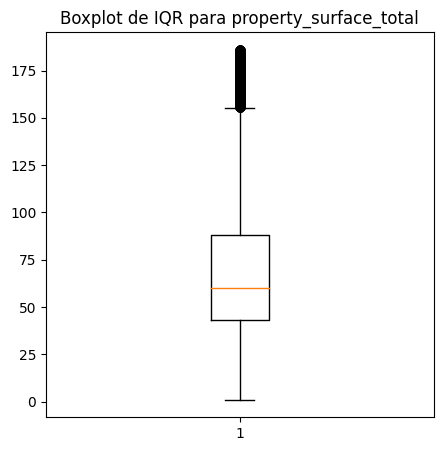

In [93]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

In [94]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 76 registros en train
Se han eliminado: 18 registros en test


In [95]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [96]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5587. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1333. Constituyen al 7% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


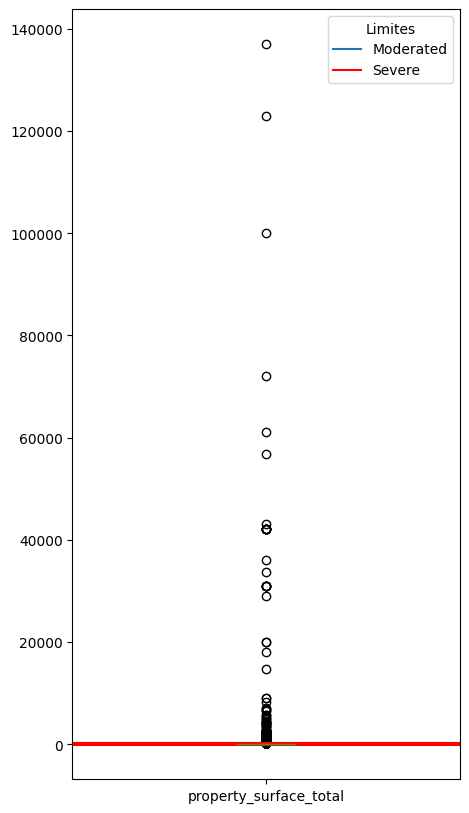

In [97]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

0-272       3204
272-500     2075
500-750      192
1000-inf      92
750-1000      24
Name: property_surface_total, dtype: int64


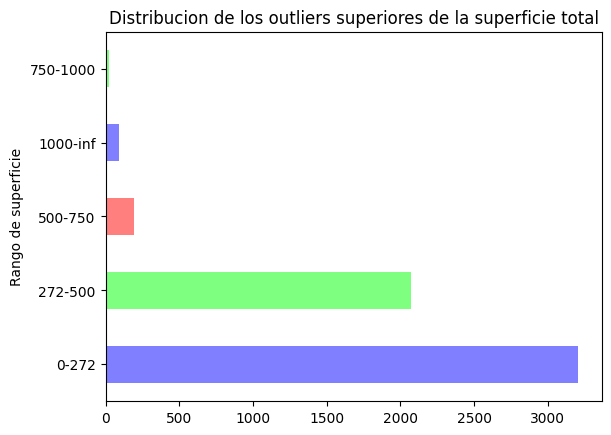

In [98]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [99]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")
    
    
    

Si bien la mediana de la superficite total es 221.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [100]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_test[ds_test['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")




Los outliers superiores de sup total en train son: 308. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 58. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


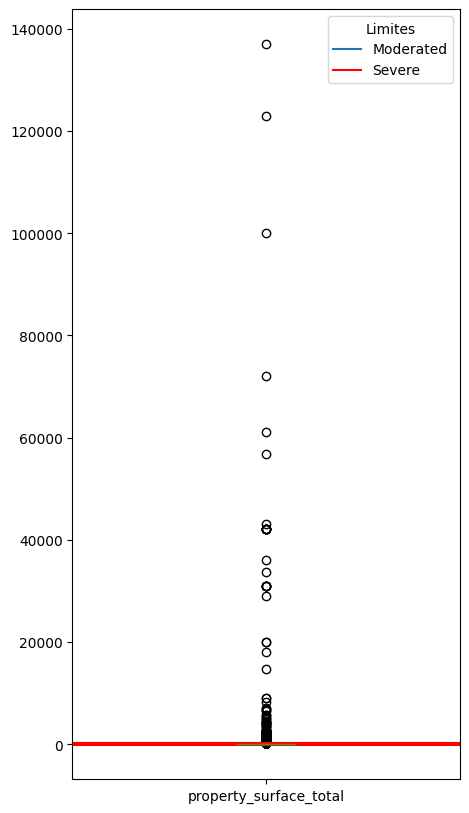

In [101]:
boxplot_with_outliers(ds_train, 'property_surface_total')

In [102]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 308 registros en train
Se han eliminado: 58 registros en test


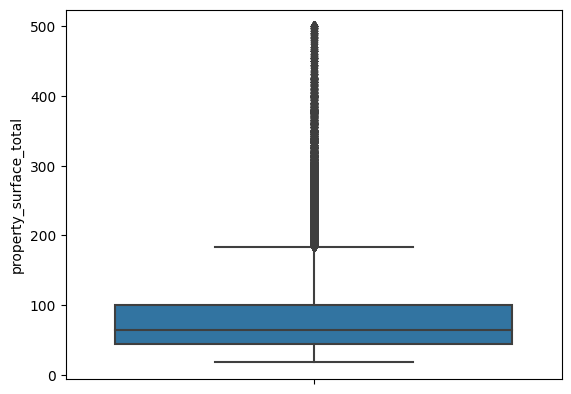

In [103]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

**Superficie cubierta**

cantidad de datos del ds: 73332
outliers encontrados para los property_surface_covered: 5825
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


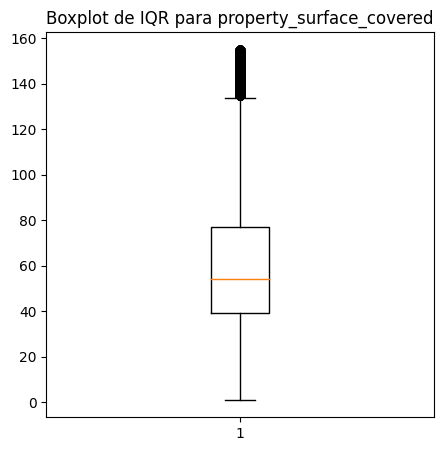

In [104]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [105]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5726. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1351. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


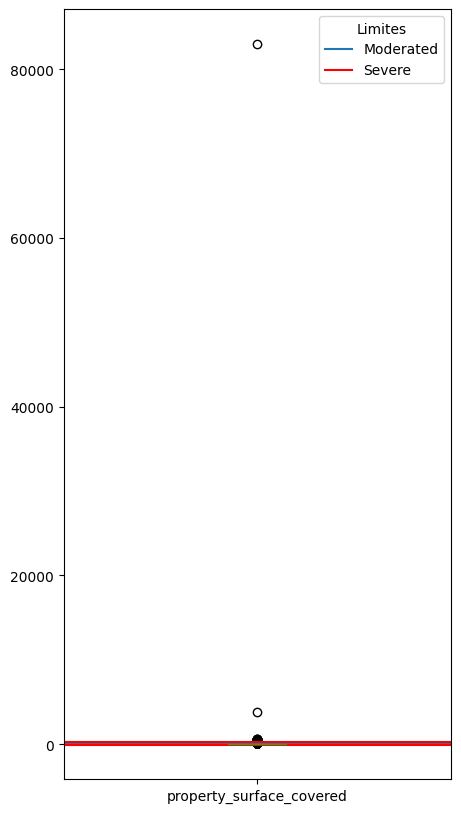

In [106]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


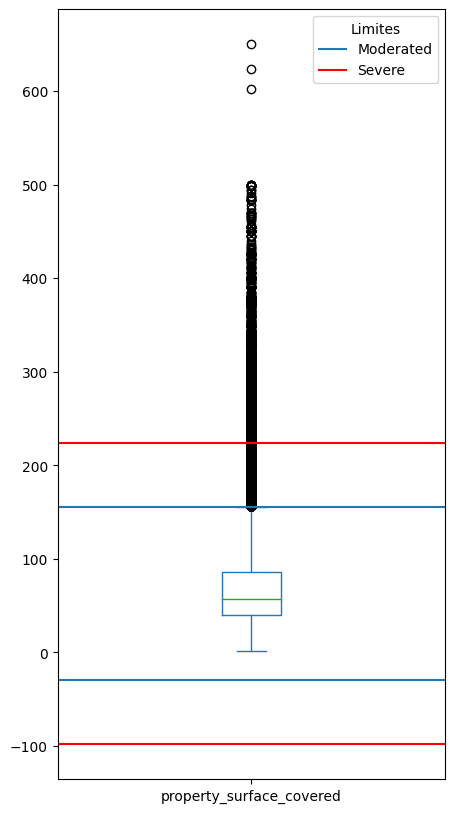

In [107]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3185
224-500     2305
500-750       69
1000-inf      19
750-1000       9
Name: property_surface_covered, dtype: int64


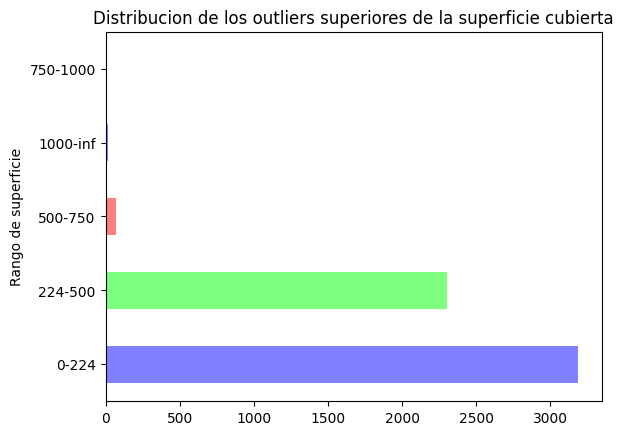

In [108]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

In [109]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 5 registros en train
Se han eliminado: 2 registros en test


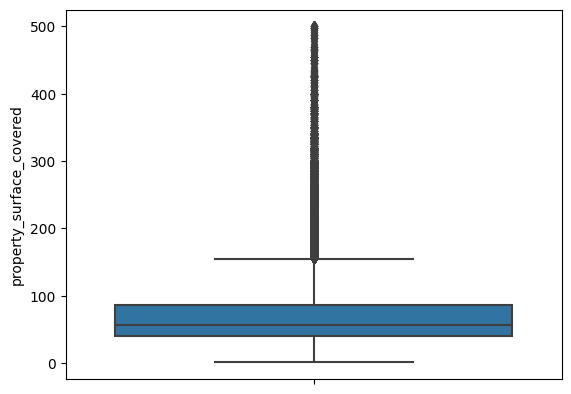

In [110]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

**Latitud y longitud**

cantidad de datos del ds: 73327
outliers encontrados para los latitud: 419
hay 0% de outliers de latitud sobre el ds
limit sup: -34.52018560387501, limite inf: -34.672459961675


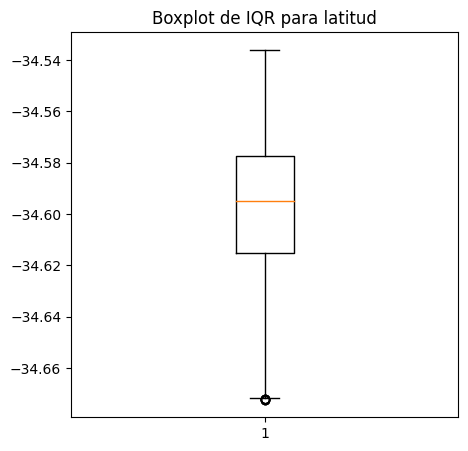

In [111]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73327
outliers encontrados para los longitud: 88
hay 0% de outliers de longitud sobre el ds
limit sup: -58.32473802499999, limite inf: -58.549850625000005


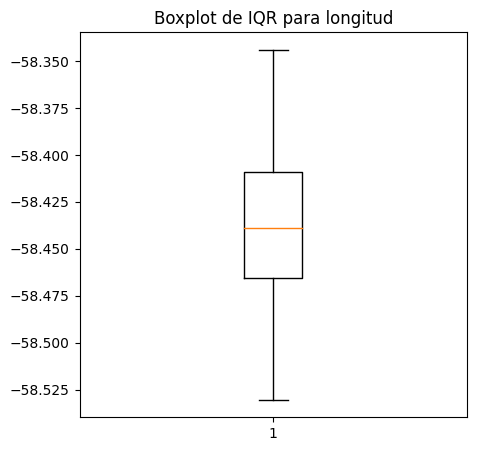

In [112]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

In [113]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73250. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 77. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17742. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 19. Constituyen al 0% de los datos


#### Metodo Z score

In [114]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

**Ambientes**

In [115]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

In [116]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 539. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 539. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 3% de los datos


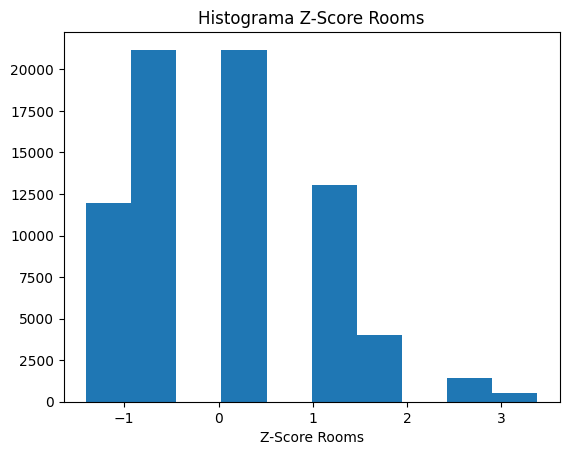

In [117]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

**Habitaciones**

In [118]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [119]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 646.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 646.Constituyen al 3% de los datos


id start_date                      end_date  \
313129  aJeuYjb9ZVKx6Ajy1piwqA== 2021-06-14 2022-07-20 00:00:00.000000000   
395126  NbR1tY7TfgYah0FfWgZSLw== 2021-02-13 2021-03-01 00:00:00.000000000   
347264  uvmADIPqlRyelMQMf00zjQ== 2021-09-30 2022-03-09 00:00:00.000000000   
357085  A1MeufpFpTJJUz+QdUA7JQ== 2021-06-29 2021-07-17 00:00:00.000000000   
176508  xgFULQ/8mvtmG+bHM7GsfA== 2021-08-31 2022-01-27 00:00:00.000000000   
...                          ...        ...                           ...   
136260  0KMmY+Oe8nuCNPl7hCgnEg== 2021-10-06 2021-12-19 18:04:43.254875588   
398024  0YXCxWB2eNxKOgR+bX564Q== 2021-02-13 2021-02-23 00:00:00.000000000   
74374   iis/AXJGQbY6DfqKaKe9+A== 2021-07-03 2022-01-07 00:00:00.000000000   
452860  HdRPL0vmKFbFDQQ2R2a1Ew== 2021-12-16 2022-02-09 00:00:00.000000000   
30669   Qz90E6gjYllga2IvKKmQJg== 2021-03-29 2021-04-15 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
313129 -34.629746 -58.456395         Flores  Departamento             6.0   
395126 -34.659578 -58.436102  Villa Soldati          Casa             5.0   
347264 -34.562314 -58.450959       Belgrano  Departamento             6.0   
357085 -34.625539 -58.464772         Flores            PH             7.0   
176508 -34.600005 -58.403289   Barrio Norte  Departamento             6.0   
...           ...        ...            ...           ...             ...   
136260 -34.623065 -58.437939      Caballito            PH             6.0   
398024 -34.561687 -58.452622       Belgrano  Departamento             7.0   
74374  -34.579417 -58.411235        Palermo  Departamento             6.0   
452860 -34.625099 -58.449283      Caballito          Casa             7.0   
30669  -34.620456 -58.374062      San Telmo            PH             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
313129                5.0                   200.0                     200.0   
395126                6.0                   223.0                     215.0   
347264                5.0                   363.0                     295.0   
357085                6.0                   355.0                     255.0   
176508                5.0                    98.0                      90.0   
...                   ...                     ...                       ...   
136260                5.0                   184.0                     184.0   
398024                5.0                   223.0                     186.0   
74374                 5.0                   377.0                     377.0   
452860                5.0                   400.0                     300.0   
30669                 5.0                   230.0                     170.0   

        property_price                                     property_title  \
313129        350000.0                              Departamento - Flores   
395126        239000.0                Casa Multifamiliar en Villa Soldati   
347264       1290000.0        Imponente Piso en Torre - O'higgins y Sucre   
357085        165000.0         PH FLORES 7 AMB. PATRIMONIO HISTORICO CABA   
176508        130000.0                        Departamento - Barrio Norte   
...                ...                                                ...   
136260        420000.0                                           Ph venta   
398024        530000.0   Departamento 7 Ambientes en Belgrano con Cochera   
74374        1148000.0  VENTA Dpto.  PB Duplex c/ 5 suites, jardín y p...   
452860        580000.0            Casa venta cabalito c/ patio y parrilla   
30669         280000.0                                     PH - San Telmo   

        z_property_bedrooms  
313129             3.290902  
395126             4.339793  
347264             3.290902  
357085             4.339793  
176508             3.290902  
...                     ...  
136260             3.290902  
398024             3.290902  
74374              3.290902  
452860

In [120]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

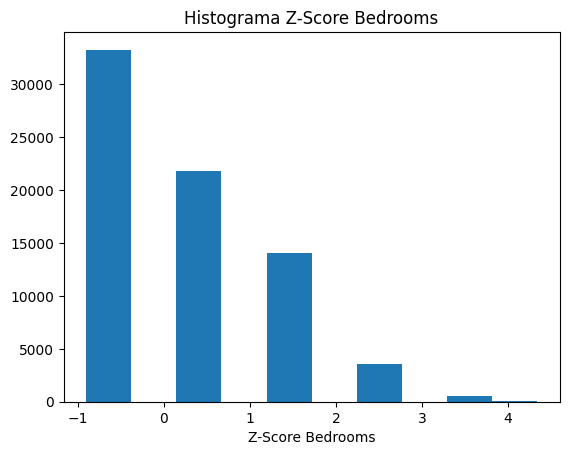

In [121]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

**Superficie Total**

In [122]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [123]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1841. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1841. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
3044    c4Wn6k/Qh1WpMoIs5zxPZg== 2021-02-20 2021-03-01 -34.629169 -58.454926   
81362   Q0WFSOInoCXFXABQLleT5Q== 2021-03-12 2021-06-05 -34.604431 -58.508930   
204921  rRzSATYOIPZfxaDiP+pJCA== 2021-12-11 2022-01-27 -34.586252 -58.394430   
338929  IdyBCh4YNjHewXB++YAK7A== 2021-06-01 2021-06-02 -34.564829 -58.497503   
347264  uvmADIPqlRyelMQMf00zjQ== 2021-09-30 2022-03-09 -34.562314 -58.450959   

             place_l3 property_type  property_rooms  property_bedrooms  \
3044        Caballito            PH             5.0                4.0   
81362    Villa Devoto          Casa             4.0                3.0   
204921       Recoleta  Departamento             5.0                4.0   
338929  Villa Urquiza          Casa             5.0                4.0   
347264       Belgrano  Departamento             6.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
3044                     334.0                     239.0        490000.0   
81362                    300.0                     200.0        420000.0   
204921                   300.0                     250.0        970000.0   
338929                   296.0                     296.0        595000.0   
347264                   363.0                     295.0       1290000.0   

                                           property_title  \
3044    ALBERDI Y P. GOYENA - VENTA PH 5 AMB + ALTA RENTA   
81362   VENTA EXCELENTE CASA CON COCHERA, PATIO Y DOS ...   
204921        Hermoso departamento en Pueyrredon al 2400!   
338929  Islandia 5500, Villa Urquiza - Acepta Permuta ...   
347264        Imponente Piso en Torre - O'higgins y Sucre   

        z_property_surface_total  
3044                    3.773655  
81362                   3.256638  
204921                  3.256638  
338929                  3.195813  
347264                  4.214639

In [124]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

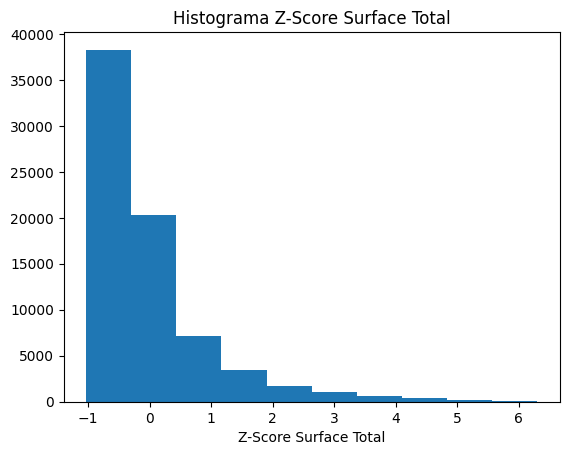

In [125]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

**Superficie Cubierta**

In [126]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [127]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1758. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1758. Constituyen al 9% de los datos


id start_date   end_date    latitud   longitud  \
362483  iCAJszpbbh7eMJIa5aMUYg== 2021-01-16 2021-10-09 -34.593498 -58.376111   
361811  4tbIEI3kBEd6oNeE5/UAtA== 2021-01-16 2021-06-04 -34.581153 -58.405111   
204921  rRzSATYOIPZfxaDiP+pJCA== 2021-12-11 2022-01-27 -34.586252 -58.394430   
349977  CiCKwXB2i+ZGakg9Y6gpuQ== 2021-04-16 2021-06-05 -34.594751 -58.393546   
338929  IdyBCh4YNjHewXB++YAK7A== 2021-06-01 2021-06-02 -34.564829 -58.497503   
...                          ...        ...        ...        ...        ...   
306135  TtRjWuVtW5sS62O6jusNog== 2021-03-04 2021-03-12 -34.567198 -58.430706   
452860  HdRPL0vmKFbFDQQ2R2a1Ew== 2021-12-16 2022-02-09 -34.625099 -58.449283   
430352  57QzVDt1qCO1UjqHCjQN6g== 2021-12-16 2022-02-09 -34.591352 -58.408773   
20807   ew5Vslble10N1hyTKosWOg== 2021-03-15 2021-06-05 -34.554070 -58.455108   
241873  HCmYrGsZa2fIbKh9+m8OSQ== 2021-04-01 2021-04-06 -34.607454 -58.505183   

             place_l3 property_type  property_rooms  property_bedrooms  \
362483       Recoleta  Departamento             4.0                3.0   
361811        Palermo  Departamento             5.0                4.0   
204921       Recoleta  Departamento             5.0                4.0   
349977       Recoleta  Departamento             5.0                4.0   
338929  Villa Urquiza          Casa             5.0                4.0   
...               ...           ...             ...                ...   
306135        Palermo  Departamento             5.0                3.0   
452860      Caballito          Casa             7.0                5.0   
430352   Barrio Norte  Departamento             6.0                4.0   
20807        Belgrano  Departamento             5.0                4.0   
241873   Villa Devoto          Casa             4.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
362483                   282.0                     282.0        890000.0   
361811                   280.0                     280.0       1400000.0   
204921                   300.0                     250.0        970000.0   
349977                   270.0                     265.0        669000.0   
338929                   296.0                     296.0        595000.0   
...                        ...                       ...             ...   
306135                   350.0                     350.0       2100000.0   
452860                   400.0                     300.0        580000.0   
430352                   268.0                     246.0        525000.0   
20807                    500.0                     470.0       1700000.0   
241873                   287.0                     255.0        497000.0   

                                           property_title  \
362483                           Departamento en Recoleta   
361811                            Departamento en Palermo   
204921        Hermoso departamento en Pueyrredon al 2400!   
349977  PISO 26 y 27 VISTA INCREÍBLE AL RÍO -  270 m2 ...   
338929  Islandia 5500, Villa Urquiza - Acepta Permuta ...   
...                                                   ...   
306135  VENTA increible DUPLEX RECICLADO con excelente...   
452860            Casa venta cabalito c/ patio y parrilla   
430352  Departamento en venta barrio norte 6 Amb. c/ coch   
20807   Excelente departamento de 4 ambientes en venta...   
241873  Venta Casa 4 Amb C/patio, Terraza y Quincho De...   

        z_property_surface_covered  
362483                    3.708685  
361811                    3.672902  
204921                    3.136154  
349977                    3.404528  
338929                    3.959168  
...                            ...  
306135                    4.925314  
452860                    4.030734  
430352                    3.064588  
20807                     7.072304  
241873                    3.225612  

[1758 rows x 14 columns]

In [128]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

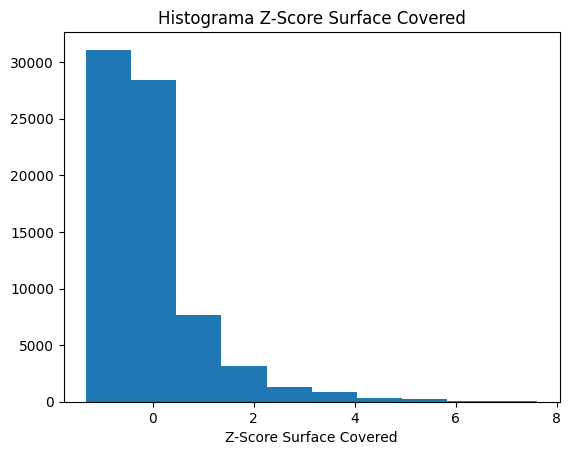

In [129]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

**Latitud y Longitud**

In [130]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [131]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 79. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 79. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.616670 -54.133330   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 -33.081030 -68.468140   
190837  lbkcXjbTF75T6OaMET9cTA== 2021-11-01 2022-01-27 -31.363175 -64.341195   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 -24.372960 -65.027110   
...                          ...        ...        ...        ...        ...   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 -29.413454 -66.856458   
102581  IuzOluk1XiJO9uMBEFtQYw== 2021-05-28 2021-06-05 -32.968353 -60.623047   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 -31.465924 -64.418035   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.689920 -57.556660   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 -32.960197 -60.631355   

       place_l3 property_type  property_rooms  property_bedrooms  \
241662      NaN          Casa             4.0                3.0   
156989      NaN  Departamento             3.0                2.0   
190837      NaN          Casa             3.0                2.0   
45536       NaN          Casa             3.0                2.0   
324539      NaN          Casa             4.0                3.0   
...         ...           ...             ...                ...   
43776       NaN  Departamento             2.0                1.0   
102581      NaN  Departamento             3.0                2.0   
138208      NaN          Casa             2.0                1.0   
187631      NaN  Departamento             5.0                4.0   
102602      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
241662                   230.0                     200.0        255000.0   
156989                    71.0                      67.0         93000.0   
190837                   300.0                     125.0         91900.0   
45536                    307.0                     106.0        139000.0   
324539                   174.0                     174.0        150000.0   
...                        ...                       ...             ...   
43776                     45.0                      45.0         50000.0   
102581                    58.0                      58.0         63000.0   
138208                   500.0                     100.0         80000.0   
187631                   158.0                     150.0        380000.0   
102602                    60.0                      60.0         80000.0   

                                           property_title  z_latitud  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...  51.884462  
156989  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS   9.837677  
190837           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS  21.011295  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  16.440321  
324539        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES  66.478450  
...                                                   ...        ...  
43776   Departamento VENTA - 1 dormitorio 1 baño - Cas...  33.693061  
102581  Oportunidad. Se vende departamento en zona de ...  10.570576  
138208  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...  20.342973  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...  31.894814  
102602              Departamento de 1 dormitorio en venta  10.623625  

[79 rows x 14 columns]

In [132]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 9. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 9. Constituyen al 0% de los datos


id start_date                      end_date  \
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 18:04:43.254875588   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 18:04:43.254875588   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
457631 -53.788624 -67.718089      NaN  Departamento             3.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
106297 -41.086352 -71.185720      NaN  Departamento             2.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
410404 -38.964493 -68.075830      NaN          Casa             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
208085                1.0                    60.0                      50.0   
131188                1.0                    66.0                      56.0   
457631                2.0                   121.0                     100.0   
105792                1.0                    53.0                      53.0   
155333                2.0                    70.0                      70.0   
106297                1.0                    53.0                      53.0   
10486                 3.0                   100.0                     100.0   
324200                2.0                    55.0                      55.0   
410404                5.0                   218.0                     218.0   

        property_price                                     property_title  \
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
457631        375000.0                Depto 3 ambientes Arboris Las Lomas   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
106297        145000.0  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...   
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
410404        230000.0  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...   

         z_latitud  
208085  -42.225776  
131188  -42.210351  
457631 -124.852802  
105792  -42.222694  
155333  -42.737997  
106297  -42.232142  
10486   -42.736061  
324200  -28.272885  
410404  -28.430723

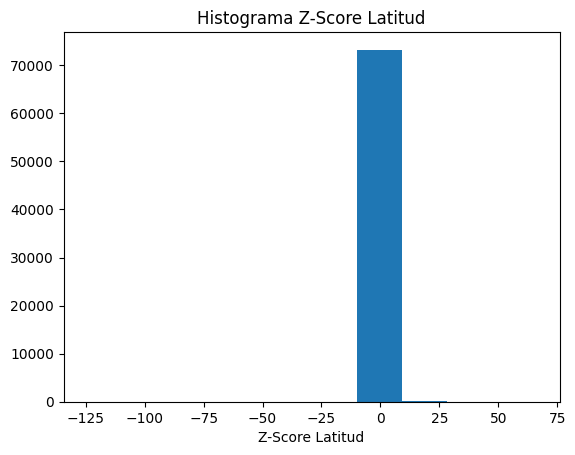

In [133]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [134]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
332847  rPVUO/G5qAkzU2G3JoGb4w== 2021-09-17 2021-11-03 -34.644207 -58.498511   
354335  OtY68BduakKcQqaAGkU7Qw== 2021-11-04 2021-11-12 -34.617285 -58.396332   
25909   AJE6KbG6vKHbaVQsntYXvg== 2021-06-24 2021-10-28 -34.587229 -58.420653   
44150   6x2KFeXEzFzDasGyq/mSCA== 2021-11-23 2021-12-03 -34.621213 -58.432909   
63837   xt+DnMzqxMkpiuKTfy/1iA== 2021-06-22 2022-07-17 -34.562502 -58.453964   

         place_l3 property_type  property_rooms  property_bedrooms  \
332847  Mataderos            PH             3.0                2.0   
354335  Balvanera  Departamento             1.0                1.0   
25909     Palermo  Departamento             4.0                3.0   
44150   Caballito  Departamento             4.0                3.0   
63837    Belgrano  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
332847                    73.0                      73.0        135000.0   
354335                    43.0                      43.0         59800.0   
25909                    118.0                     118.0        229000.0   
44150                    113.0                     107.0        320000.0   
63837                     24.0                      24.0         60000.0   

                                           property_title  z_latitud  
332847             Excelente Ph 3 amb.- Venta-Barrio Naon  -0.329854  
354335                           Departamento - Balvanera  -0.154738  
25909   OPORTUNIDAD IMPECABLE  SEMIPISO DE 118 m2 EN P...   0.040754  
44150   Departamento - Caballito - Venta - 4 Ambientes...  -0.180291  
63837                   Departamento - Belgrano Barrancas   0.201589

In [135]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 6. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 6. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   

       place_l3 property_type  property_rooms  property_bedrooms  \
241662      NaN          Casa             4.0                3.0   
220851      NaN          Casa             4.0                2.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
241662                   230.0                     200.0        255000.0   
220851                   105.0                     105.0        190000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   

                                           property_title  z_longitud  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.175959  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.023251  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.023251  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.746958  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.746958  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.540674

In [136]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 80. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 80. Constituyen al 0% de los datos


id start_date                      end_date  \
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 18:04:43.254875588   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 00:00:00.000000000   
190837  lbkcXjbTF75T6OaMET9cTA== 2021-11-01 2022-01-27 00:00:00.000000000   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 00:00:00.000000000   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 00:00:00.000000000   
...                          ...        ...                           ...   
315782  9K6my00yIhsJWnj0oKe75g== 2021-09-29 2022-02-09 00:00:00.000000000   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 00:00:00.000000000   
102581  IuzOluk1XiJO9uMBEFtQYw== 2021-05-28 2021-06-05 00:00:00.000000000   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 00:00:00.000000000   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
156989 -33.081030 -68.468140      NaN  Departamento             3.0   
190837 -31.363175 -64.341195      NaN          Casa             3.0   
45536  -32.065926 -64.527838      NaN          Casa             3.0   
324539 -24.372960 -65.027110      NaN          Casa             4.0   
...           ...        ...      ...           ...             ...   
315782 -31.353637 -63.380127      NaN          Casa             4.0   
43776  -29.413454 -66.856458      NaN  Departamento             2.0   
102581 -32.968353 -60.623047      NaN  Departamento             3.0   
138208 -31.465924 -64.418035      NaN          Casa             2.0   
102602 -32.960197 -60.631355      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
208085                1.0                    60.0                      50.0   
156989                2.0                    71.0                      67.0   
190837                2.0                   300.0                     125.0   
45536                 2.0                   307.0                     106.0   
324539                3.0                   174.0                     174.0   
...                   ...                     ...                       ...   
315782                3.0                   326.0                      66.0   
43776                 1.0                    45.0                      45.0   
102581                2.0                    58.0                      58.0   
138208                1.0                   500.0                     100.0   
102602                1.0                    60.0                      60.0   

        property_price                                     property_title  \
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
156989         93000.0  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS   
190837         91900.0           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS   
45536         139000.0  Se Vende Casa Amoblada en Santa Rosa de Calamu...   
324539        150000.0        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES   
...                ...                                                ...   
315782        135000.0  Casa en venta. 4 amb. Acepta permuta, apto cre...   
43776          50000.0  Departamento VENTA - 1 dormitorio 1 baño - Cas...   
102581         63000.0  Oportunidad. Se vende departamento en zona de ...   
138208         80000.0  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...   
102602         80000.0              Departamento de 1 dormitorio en venta   

        z_longitud  
208085  -50.744698  
156989  -39.920267  
190837  -23.482450  
45536   -24.225859  
324539  -26.214482  
...            ...  
315782  -19.654470  
43776   -33.500861  
102581   -8.672891  
138208  -23.788509  
102602   -8.705981  

[80 rows x 14 columns]

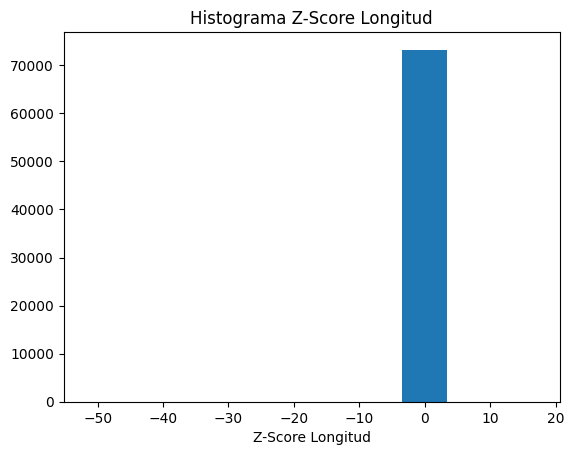

In [137]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

**Metodo Z Score modificado**

In [138]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

**Ambientes**

In [139]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

In [140]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [141]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

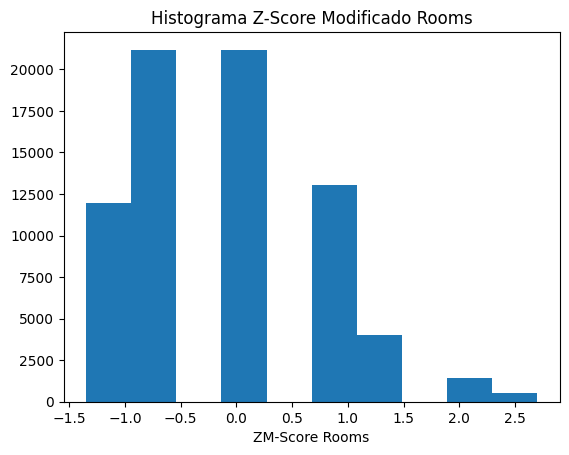

In [142]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

**Habitaciones**

In [143]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [144]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [145]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

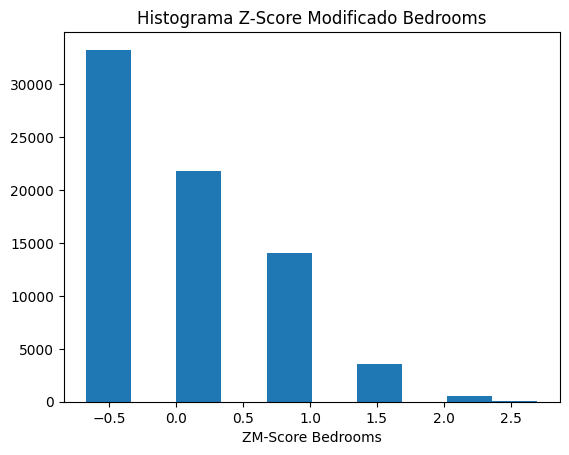

In [146]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

**Superficie Total**

In [147]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
332847  rPVUO/G5qAkzU2G3JoGb4w== 2021-09-17 2021-11-03 -34.644207 -58.498511   
354335  OtY68BduakKcQqaAGkU7Qw== 2021-11-04 2021-11-12 -34.617285 -58.396332   
25909   AJE6KbG6vKHbaVQsntYXvg== 2021-06-24 2021-10-28 -34.587229 -58.420653   
44150   6x2KFeXEzFzDasGyq/mSCA== 2021-11-23 2021-12-03 -34.621213 -58.432909   
63837   xt+DnMzqxMkpiuKTfy/1iA== 2021-06-22 2022-07-17 -34.562502 -58.453964   

         place_l3 property_type  property_rooms  property_bedrooms  \
332847  Mataderos            PH             3.0                2.0   
354335  Balvanera  Departamento             1.0                1.0   
25909     Palermo  Departamento             4.0                3.0   
44150   Caballito  Departamento             4.0                3.0   
63837    Belgrano  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
332847                    73.0                      73.0        135000.0   
354335                    43.0                      43.0         59800.0   
25909                    118.0                     118.0        229000.0   
44150                    113.0                     107.0        320000.0   
63837                     24.0                      24.0         60000.0   

                                           property_title  \
332847             Excelente Ph 3 amb.- Venta-Barrio Naon   
354335                           Departamento - Balvanera   
25909   OPORTUNIDAD IMPECABLE  SEMIPISO DE 118 m2 EN P...   
44150   Departamento - Caballito - Venta - 4 Ambientes...   
63837                   Departamento - Belgrano Barrancas   

        zm_property_surface_total  
332847                   0.252937  
354335                  -0.590187  
25909                    1.517625  
44150                    1.377104  
63837                   -1.124167

In [148]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5481. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5481. Constituyen al 30% de los datos


id start_date   end_date    latitud   longitud  \
175918  ixIsDhYaJ1wKp2FEB/0EEw== 2021-08-31 2021-09-06 -34.545454 -58.460905   
3044    c4Wn6k/Qh1WpMoIs5zxPZg== 2021-02-20 2021-03-01 -34.629169 -58.454926   
204306  vIj6h4D/nIBSaYLYxqpgug== 2021-05-10 2021-06-05 -34.609697 -58.362617   
81362   Q0WFSOInoCXFXABQLleT5Q== 2021-03-12 2021-06-05 -34.604431 -58.508930   
362483  iCAJszpbbh7eMJIa5aMUYg== 2021-01-16 2021-10-09 -34.593498 -58.376111   
...                          ...        ...        ...        ...        ...   
48045   P+fTymL4fjTQcK9EfCwnvw== 2021-03-14 2021-06-05 -34.571942 -58.422270   
20807   ew5Vslble10N1hyTKosWOg== 2021-03-15 2021-06-05 -34.554070 -58.455108   
30669   Qz90E6gjYllga2IvKKmQJg== 2021-03-29 2021-04-15 -34.620456 -58.374062   
70148   ktMxvCajVhwVIbsJDNrO2w== 2021-09-23 2021-09-23 -34.595383 -58.380377   
241873  HCmYrGsZa2fIbKh9+m8OSQ== 2021-04-01 2021-04-06 -34.607454 -58.505183   

             place_l3 property_type  property_rooms  property_bedrooms  \
175918          Nuñez  Departamento             4.0                3.0   
3044        Caballito            PH             5.0                4.0   
204306  Puerto Madero  Departamento             4.0                3.0   
81362    Villa Devoto          Casa             4.0                3.0   
362483       Recoleta  Departamento             4.0                3.0   
...               ...           ...             ...                ...   
48045         Palermo  Departamento             4.0                3.0   
20807        Belgrano  Departamento             5.0                4.0   
30669       San Telmo            PH             7.0                5.0   
70148        Recoleta  Departamento             7.0                4.0   
241873   Villa Devoto          Casa             4.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
175918                   200.0                     200.0        500000.0   
3044                     334.0                     239.0        490000.0   
204306                   224.0                     224.0       1400000.0   
81362                    300.0                     200.0        420000.0   
362483                   282.0                     282.0        890000.0   
...                        ...                       ...             ...   
48045                    234.0                     220.0        530000.0   
20807                    500.0                     470.0       1700000.0   
30669                    230.0                     170.0        280000.0   
70148                    231.0                     231.0        350000.0   
241873                   287.0                     255.0        497000.0   

                                           property_title  \
175918                               Departamento - Nuñez   
3044    ALBERDI Y P. GOYENA - VENTA PH 5 AMB + ALTA RENTA   
204306  Espectacular y Unico Duplex Torre Renoir. Rio....   
81362   VENTA EXCELENTE CASA CON COCHERA, PATIO Y DOS ...   
362483                           Departamento en Recoleta   
...                                                   ...   
48045                              Departamento - Palermo   
20807   Excelente departamento de 4 ambientes en venta...   
30669                                      PH - San Telmo   
70148   Piso de gran categoría en Edificio de estilo f...   
241873  Venta Casa 4 Amb C/patio, Terraza y Quincho De...   

        zm_property_surface_total  
175918                   3.822167  
3044                     7.588125  
204306                   4.496667  
81362                    6.632583  
362483                   6.126708  
...                           ...  
48045                    4.777708  
20807                   12.253417  
30669                    4.665292  
70148                    4.693396  
241873                   6.267229  

[5481 rows x 14 columns]

In [149]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

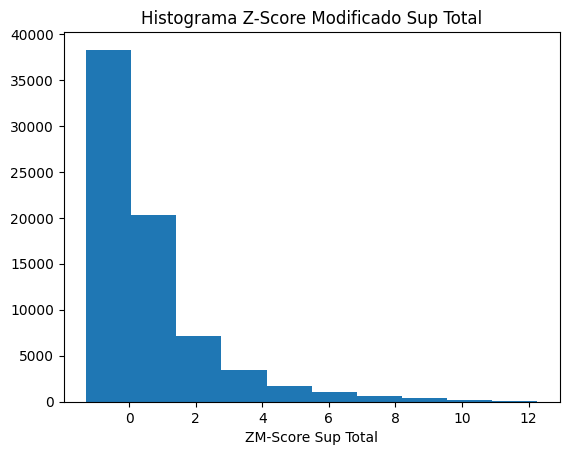

In [150]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

**Superficie Cubierta**

In [151]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

In [152]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date   end_date    latitud   longitud  \
175918  ixIsDhYaJ1wKp2FEB/0EEw== 2021-08-31 2021-09-06 -34.545454 -58.460905   
3044    c4Wn6k/Qh1WpMoIs5zxPZg== 2021-02-20 2021-03-01 -34.629169 -58.454926   
204306  vIj6h4D/nIBSaYLYxqpgug== 2021-05-10 2021-06-05 -34.609697 -58.362617   
81362   Q0WFSOInoCXFXABQLleT5Q== 2021-03-12 2021-06-05 -34.604431 -58.508930   
362483  iCAJszpbbh7eMJIa5aMUYg== 2021-01-16 2021-10-09 -34.593498 -58.376111   
...                          ...        ...        ...        ...        ...   
48045   P+fTymL4fjTQcK9EfCwnvw== 2021-03-14 2021-06-05 -34.571942 -58.422270   
20807   ew5Vslble10N1hyTKosWOg== 2021-03-15 2021-06-05 -34.554070 -58.455108   
30669   Qz90E6gjYllga2IvKKmQJg== 2021-03-29 2021-04-15 -34.620456 -58.374062   
70148   ktMxvCajVhwVIbsJDNrO2w== 2021-09-23 2021-09-23 -34.595383 -58.380377   
241873  HCmYrGsZa2fIbKh9+m8OSQ== 2021-04-01 2021-04-06 -34.607454 -58.505183   

             place_l3 property_type  property_rooms  property_bedrooms  \
175918          Nuñez  Departamento             4.0                3.0   
3044        Caballito            PH             5.0                4.0   
204306  Puerto Madero  Departamento             4.0                3.0   
81362    Villa Devoto          Casa             4.0                3.0   
362483       Recoleta  Departamento             4.0                3.0   
...               ...           ...             ...                ...   
48045         Palermo  Departamento             4.0                3.0   
20807        Belgrano  Departamento             5.0                4.0   
30669       San Telmo            PH             7.0                5.0   
70148        Recoleta  Departamento             7.0                4.0   
241873   Villa Devoto          Casa             4.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
175918                   200.0                     200.0        500000.0   
3044                     334.0                     239.0        490000.0   
204306                   224.0                     224.0       1400000.0   
81362                    300.0                     200.0        420000.0   
362483                   282.0                     282.0        890000.0   
...                        ...                       ...             ...   
48045                    234.0                     220.0        530000.0   
20807                    500.0                     470.0       1700000.0   
30669                    230.0                     170.0        280000.0   
70148                    231.0                     231.0        350000.0   
241873                   287.0                     255.0        497000.0   

                                           property_title  \
175918                               Departamento - Nuñez   
3044    ALBERDI Y P. GOYENA - VENTA PH 5 AMB + ALTA RENTA   
204306  Espectacular y Unico Duplex Torre Renoir. Rio....   
81362   VENTA EXCELENTE CASA CON COCHERA, PATIO Y DOS ...   
362483                           Departamento en Recoleta   
...                                                   ...   
48045                              Departamento - Palermo   
20807   Excelente departamento de 4 ambientes en venta...   
30669                                      PH - San Telmo   
70148   Piso de gran categoría en Edificio de estilo f...   
241873  Venta Casa 4 Amb C/patio, Terraza y Quincho De...   

        zm_property_surface_covered  
175918                     4.822675  
3044                       6.137950  
204306                     5.632075  
81362                      4.822675  
362483                     7.588125  
...                             ...  
48045                      5.497175  
20807                     13.928425  
30669                      3.810925  
70148                      5.868150  
241873                     6.677550  

[5246 rows x 14 columns]

In [153]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

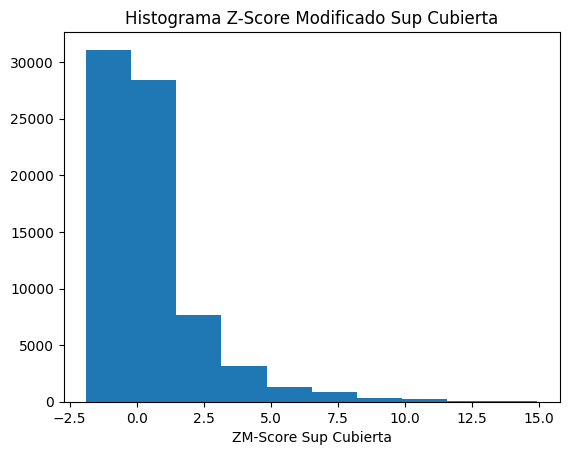

In [154]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

**Latitud y longitud**

In [155]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

In [156]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.616670 -54.133330   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 -33.081030 -68.468140   
190837  lbkcXjbTF75T6OaMET9cTA== 2021-11-01 2022-01-27 -31.363175 -64.341195   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 -24.372960 -65.027110   
...                          ...        ...        ...        ...        ...   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 -29.413454 -66.856458   
102581  IuzOluk1XiJO9uMBEFtQYw== 2021-05-28 2021-06-05 -32.968353 -60.623047   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 -31.465924 -64.418035   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.689920 -57.556660   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 -32.960197 -60.631355   

       place_l3 property_type  property_rooms  property_bedrooms  \
241662      NaN          Casa             4.0                3.0   
156989      NaN  Departamento             3.0                2.0   
190837      NaN          Casa             3.0                2.0   
45536       NaN          Casa             3.0                2.0   
324539      NaN          Casa             4.0                3.0   
...         ...           ...             ...                ...   
43776       NaN  Departamento             2.0                1.0   
102581      NaN  Departamento             3.0                2.0   
138208      NaN          Casa             2.0                1.0   
187631      NaN  Departamento             5.0                4.0   
102602      NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
241662                   230.0                     200.0        255000.0   
156989                    71.0                      67.0         93000.0   
190837                   300.0                     125.0         91900.0   
45536                    307.0                     106.0        139000.0   
324539                   174.0                     174.0        150000.0   
...                        ...                       ...             ...   
43776                     45.0                      45.0         50000.0   
102581                    58.0                      58.0         63000.0   
138208                   500.0                     100.0         80000.0   
187631                   158.0                     150.0        380000.0   
102602                    60.0                      60.0         80000.0   

                                           property_title  zm_latitud  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...  282.583588  
156989  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS   53.629722  
190837           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS  114.472495  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...   89.582551  
324539        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES  362.051019  
...                                                   ...         ...  
43776   Departamento VENTA - 1 dormitorio 1 baño - Cas...  183.527461  
102581  Oportunidad. Se vende departamento en zona de ...   57.620516  
138208  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...  110.833337  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...  173.735617  
102602              Departamento de 1 dormitorio en venta   57.909377  

[79 rows x 14 columns]

In [157]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 28. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 28. Constituyen al 0% de los datos


id start_date                      end_date  \
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 18:04:43.254875588   
333366  aN+caRwr6laNeGIm8iZd9Q== 2021-09-17 2021-09-18 00:00:00.000000000   
146879  d25d7RgaAYPDgDV2L7hxiA== 2021-08-19 2021-08-27 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
15816   Lqn4md2saTIqk1nSZ8+MXg== 2021-04-22 2021-04-25 00:00:00.000000000   
213454  VclxezEG7N4h+PBg5Dg5jA== 2021-06-03 2021-06-18 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
210013  896AVJRoLi1HWY3kiM79UQ== 2021-07-22 2021-07-31 00:00:00.000000000   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 00:00:00.000000000   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
431958  KcYM9EqNffHbcXZT+GcNaQ== 2021-12-16 2022-02-09 00:00:00.000000000   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 00:00:00.000000000   
141494  2htnFnAl0fWYIB2Re2djvg== 2021-03-10 2021-04-19 00:00:00.000000000   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 18:04:43.254875588   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 00:00:00.000000000   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 00:00:00.000000000   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 00:00:00.000000000   
8802    Bvx15ijE/oSwZrBaowoSaQ== 2021-05-18 2021-05-19 00:00:00.000000000   
25281   z1w0RvkvD+O+9fEwEU65KQ== 2021-06-24 2021-07-03 00:00:00.000000000   
161352  GsZ5hegnoxnRL4wSr7DRag== 2021-10-07 2021-11-02 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
333366 -34.694062 -58.466105  Villa Riachuelo          Casa             5.0   
146879 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
208451 -34.694366 -58.468208     Villa Lugano  Departamento             2.0   
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
15816  -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
213454 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
131188 -41.083002 -71.182747              NaN  Departamento             2.0   
210013 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
82540  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
457631 -53.788624 -67.718089              NaN  Departamento             3.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
431958 -34.694062 -58.466105  Villa Riachuelo          Casa             5.0   
106297 -41.086352 -71.185720              NaN  Departamento             2.0   
141494 -34.694062 -58.466105  Villa Riachuelo          Casa             4.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
308365 -34.694900 -58.469161     Villa Lugano          Casa             2.0   
10486  -41.163826 -71.438923              NaN          Casa             4.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
351916 -34.694900 -58.469161     Villa Lugano          Cas

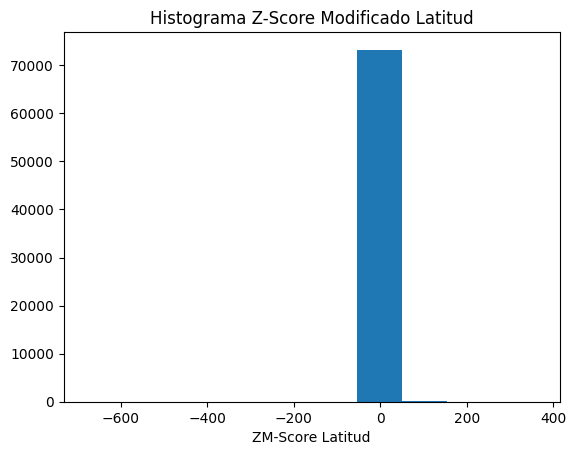

In [158]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [159]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

In [160]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   

       place_l3 property_type  property_rooms  property_bedrooms  \
241662      NaN          Casa             4.0                3.0   
220851      NaN          Casa             4.0                2.0   
134196      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
241662                   230.0                     200.0        255000.0   
220851                   105.0                     105.0        190000.0   
134196                   105.0                     105.0        200000.0   
234893                    98.0                      88.0        269000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   

                                           property_title  zm_longitud  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.586277  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.259827  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.259827  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.792922  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.792922  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.223656

In [161]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 82. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 82. Constituyen al 0% de los datos


id start_date                      end_date  \
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 18:04:43.254875588   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 00:00:00.000000000   
190837  lbkcXjbTF75T6OaMET9cTA== 2021-11-01 2022-01-27 00:00:00.000000000   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 00:00:00.000000000   
324539  lu3nDLUIBxwzOWaltbhNqg== 2021-03-03 2021-03-18 00:00:00.000000000   
...                          ...        ...                           ...   
315782  9K6my00yIhsJWnj0oKe75g== 2021-09-29 2022-02-09 00:00:00.000000000   
43776   X8cRCDhXHiXts6WCMqtU0g== 2021-11-23 2022-01-27 00:00:00.000000000   
102581  IuzOluk1XiJO9uMBEFtQYw== 2021-05-28 2021-06-05 00:00:00.000000000   
138208  rH7O71AzCmR6suehzNkPQQ== 2021-07-15 2021-07-31 00:00:00.000000000   
102602  bYfttqSqZLfrjJGdlnQWUg== 2021-05-28 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
156989 -33.081030 -68.468140      NaN  Departamento             3.0   
190837 -31.363175 -64.341195      NaN          Casa             3.0   
45536  -32.065926 -64.527838      NaN          Casa             3.0   
324539 -24.372960 -65.027110      NaN          Casa             4.0   
...           ...        ...      ...           ...             ...   
315782 -31.353637 -63.380127      NaN          Casa             4.0   
43776  -29.413454 -66.856458      NaN  Departamento             2.0   
102581 -32.968353 -60.623047      NaN  Departamento             3.0   
138208 -31.465924 -64.418035      NaN          Casa             2.0   
102602 -32.960197 -60.631355      NaN  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
208085                1.0                    60.0                      50.0   
156989                2.0                    71.0                      67.0   
190837                2.0                   300.0                     125.0   
45536                 2.0                   307.0                     106.0   
324539                3.0                   174.0                     174.0   
...                   ...                     ...                       ...   
315782                3.0                   326.0                      66.0   
43776                 1.0                    45.0                      45.0   
102581                2.0                    58.0                      58.0   
138208                1.0                   500.0                     100.0   
102602                1.0                    60.0                      60.0   

        property_price                                     property_title  \
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
156989         93000.0  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS   
190837         91900.0           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS   
45536         139000.0  Se Vende Casa Amoblada en Santa Rosa de Calamu...   
324539        150000.0        VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES   
...                ...                                                ...   
315782        135000.0  Casa en venta. 4 amb. Acepta permuta, apto cre...   
43776          50000.0  Departamento VENTA - 1 dormitorio 1 baño - Cas...   
102581         63000.0  Oportunidad. Se vende departamento en zona de ...   
138208         80000.0  CASA EN VENTA · 2 AMBIENTES · VILLA SIERRAS DE...   
102602         80000.0              Departamento de 1 dormitorio en venta   

        zm_longitud  
208085  -306.681882  
156989  -241.297952  
190837  -142.006908  
45536   -146.497401  
324539  -158.509482  
...             ...  
315782  -118.884369  
43776   -202.522151  
102581   -52.551201  
138208  -143.855629  
102602   -52.751078  

[82 rows x 14 columns]

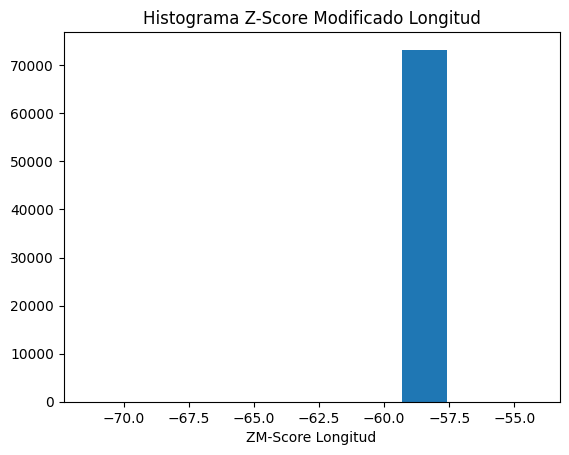

In [162]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

#### Multivariados

**Clustering - Mahalanobis**

In [163]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

In [164]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [165]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

**Analisis entre ambientes y habitaciones de valores atipicos**

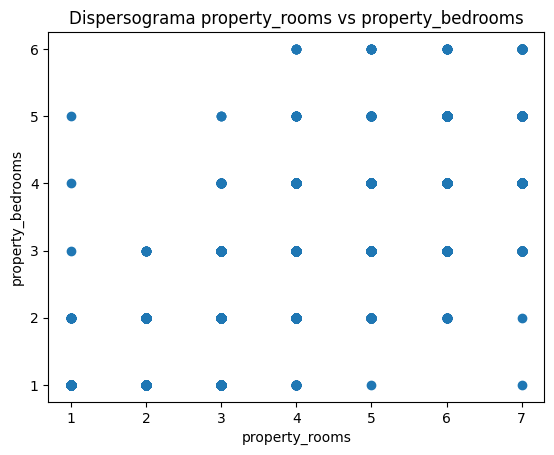

In [166]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

In [167]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
332847             3.0                2.0     0.033137
354335             1.0                1.0     3.017431
25909              4.0                3.0     1.426589
44150              4.0                3.0     1.426589
63837              1.0                1.0     3.017431

<AxesSubplot: ylabel='mahalanobis'>

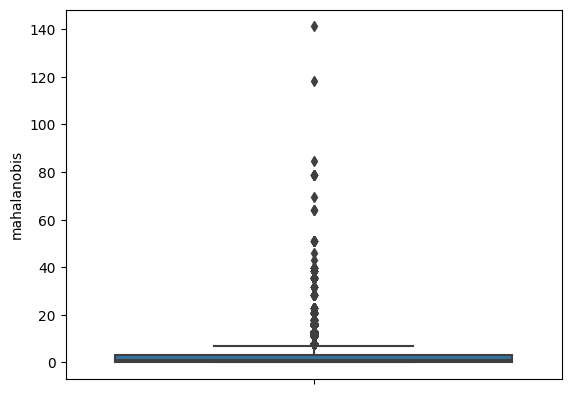

In [168]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

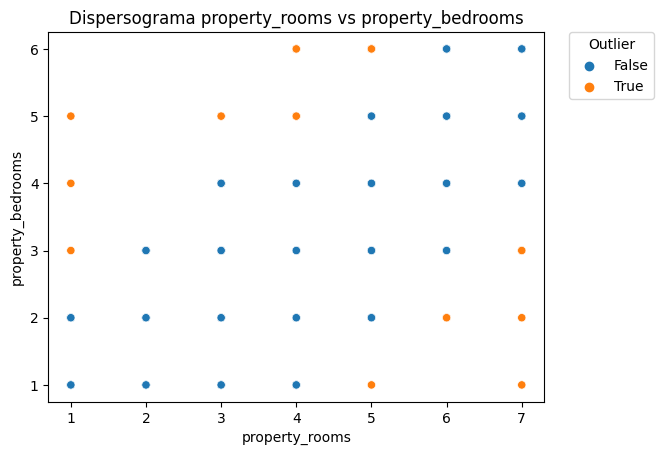

Los outliers para mahalanobis con un umbral de 35 son: 147. Constituyen el 0% de los datos


In [169]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

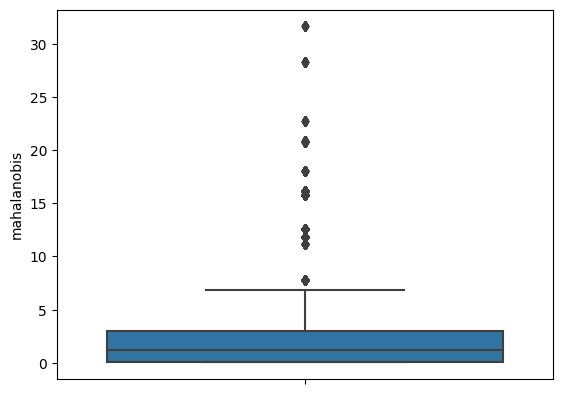

In [170]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [171]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
395126             5.0                6.0    50.914889
452318             7.0                3.0    35.594073
411229             7.0                1.0   118.204178
140906             7.0                2.0    69.623811
46470              6.0                2.0    39.600989
...                ...                ...          ...
215531             7.0                3.0    35.594073
166108             7.0                3.0    35.594073
311614             7.0                3.0    35.594073
459789             7.0                3.0    35.594073
188497             7.0                3.0    35.594073

[147 rows x 3 columns]

In [172]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 147 registros en train
Se han eliminado: 38 registros en test


Dispersograma sin los outliers mencionados


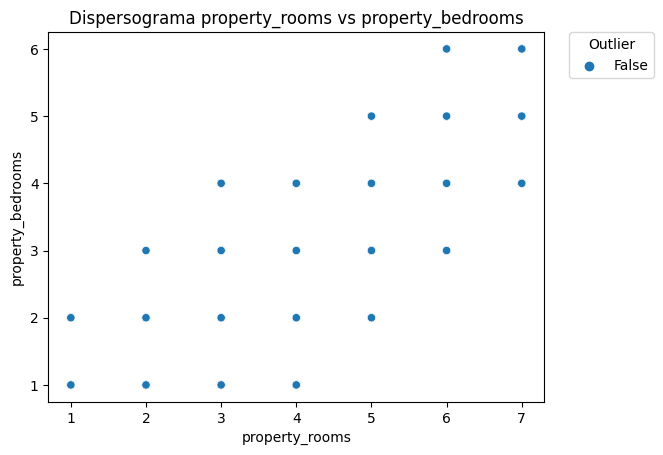

In [173]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

**Analisis entre superficie total y superificie cubierta de valores atipicos**

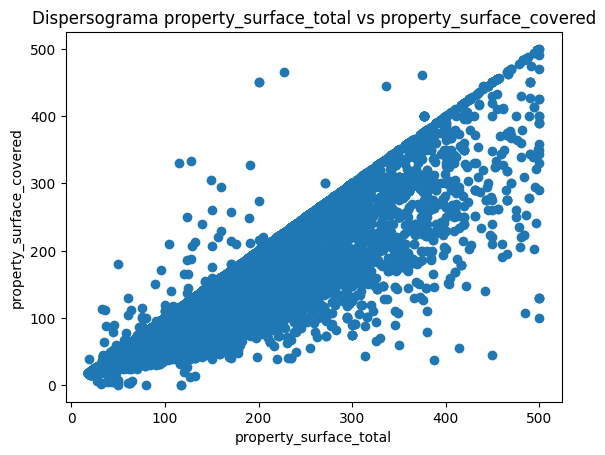

In [174]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [175]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
332847                    73.0                      73.0     0.286544
354335                    43.0                      43.0     0.452484
25909                    118.0                     118.0     1.248833
44150                    113.0                     107.0     0.532457
63837                     24.0                      24.0     0.891690

<AxesSubplot: ylabel='mahalanobis'>

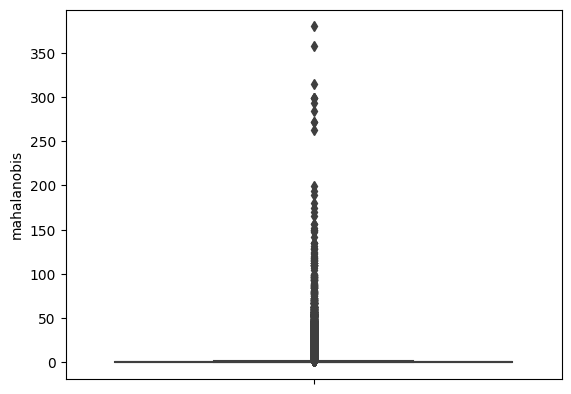

In [176]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [177]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [178]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
450430                   442.0                     140.0   193.773013
394234                   115.0                     330.0   179.933640
104592                   200.0                     450.0   271.572022
52066                    380.0                      80.0   199.663793
97083                    500.0                     130.0   299.018886
394706                   227.0                     466.0   262.386738
445383                   500.0                     130.0   299.018886
310407                   388.0                      38.0   283.720080
430838                   350.0                      60.0   189.375533
104359                   200.0                     450.0   271.572022
121279                   500.0                     130.0   299.018886
32735                    485.0                     108.0   314.984796
52468                    450.0                      45.0   379.968503
393711                   414.0                      56.0   293.071076
138208                   500.0                     100.0   357.901378

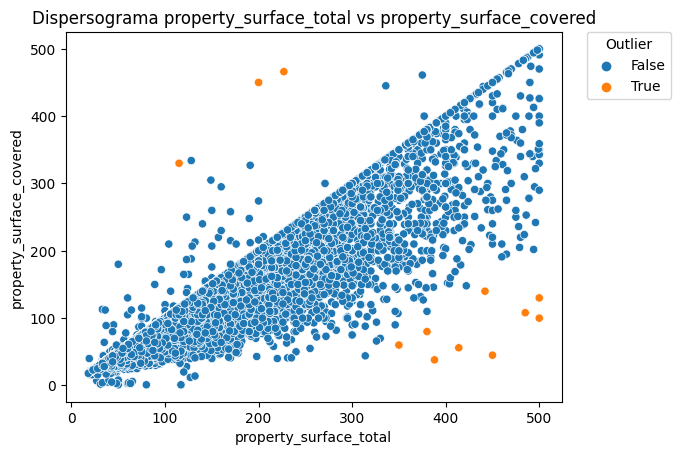

In [179]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

In [180]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 15 registros en train
Se han eliminado: 6 registros en test


Dispersograma sin los outliers mencionados


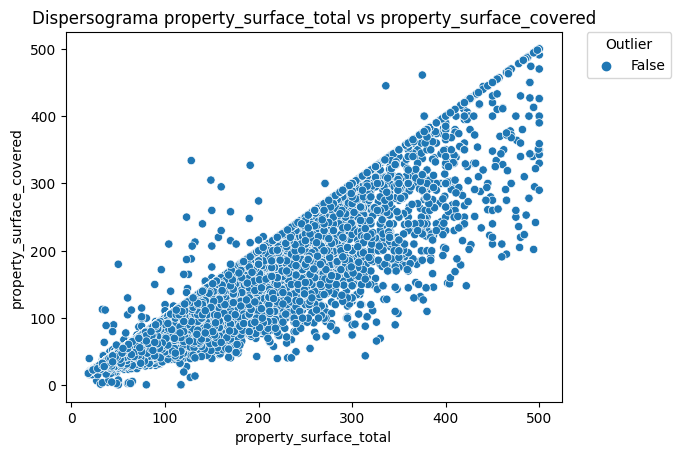

In [181]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

**Analisis entre latitud y logitud de valores atipicos**

In [182]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')

In [183]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 321.8110267253032


latitud   longitud   mahalanobis
241662 -26.616670 -54.133330   4234.682072
208085 -41.085373 -71.185766  11954.919105
156989 -33.081030 -68.468140   5421.956825
190837 -31.363175 -64.341195   2088.419950
45536  -32.065926 -64.527838   2092.462699
...           ...        ...           ...
315782 -31.353637 -63.380127   1560.897534
43776  -29.413454 -66.856458   4418.032143
102581 -32.968353 -60.623047    323.674549
187631 -29.689920 -57.556660   1131.135222
102602 -32.960197 -60.631355    326.356103

[86 rows x 3 columns]

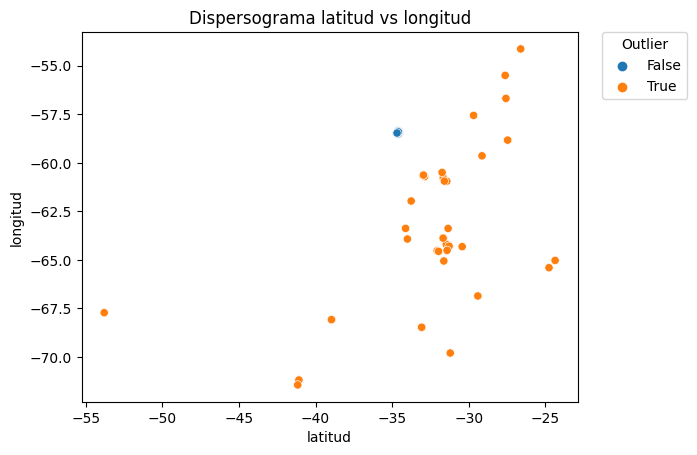

El grafico muestra 86 outliers
El mínimo según el umbral es de: 321.8110267253032


In [184]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


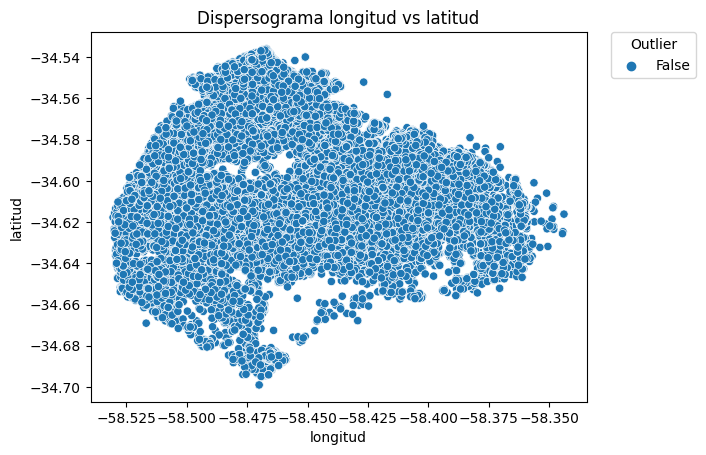

In [185]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

In [186]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 86 registros en train
Se han eliminado: 340 registros en test


In [187]:
ds_train.place_l3.isna().sum()

38

In [188]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

**Analisis entre superficie total y precio**

In [189]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73041.000000
mean         2.220237
std         15.452031
min          0.000047
25%          0.206294
50%          0.434866
75%          0.749377
max       2275.830526
Name: mahalanobis, dtype: float64

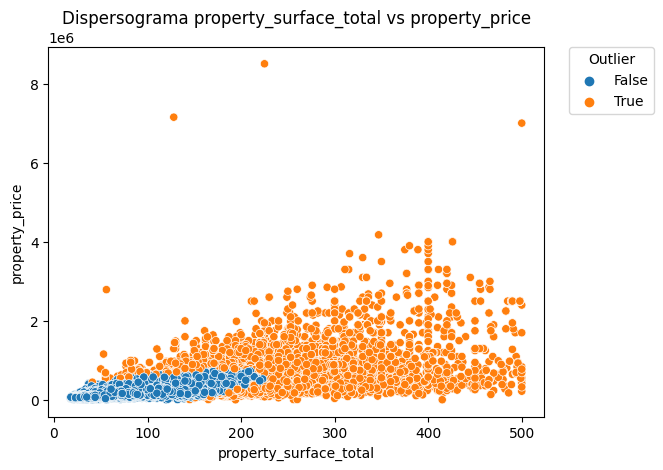

El grafico muestra 5307 outliers
El mínimo según el umbral es de: 5.0013405286808865
Los outliers representan un 7.265782231897154%


In [190]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

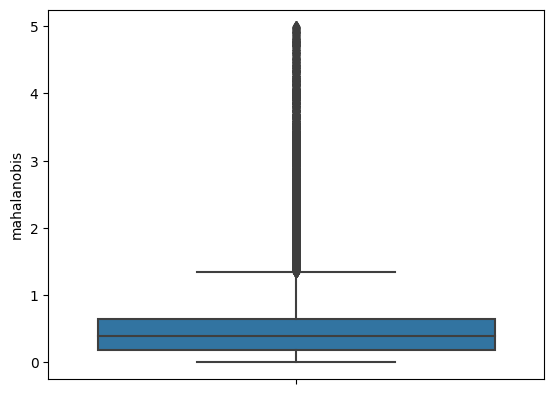

In [191]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

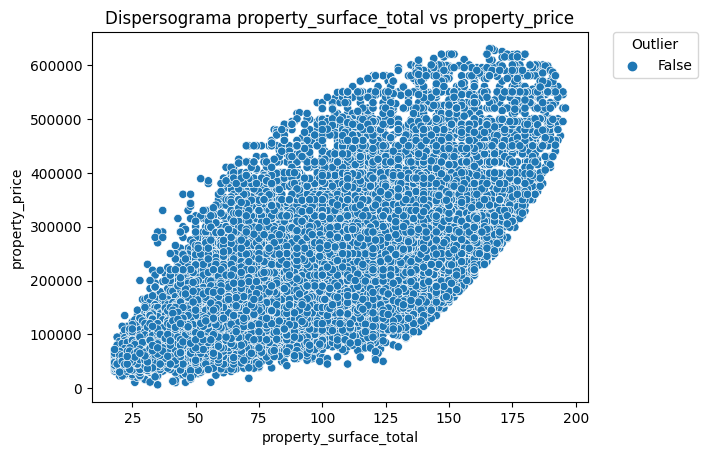

In [192]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

In [193]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73041
outliers encontrados para los price_m2: 3448
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4290.531145717464, limite inf: 322.2330367074528


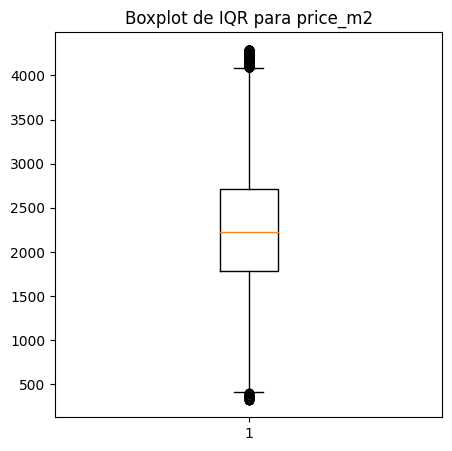

cantidad de datos del ds: 17377
outliers encontrados para los price_m2: 755
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4206.971153846154, limite inf: 405.0480769230769


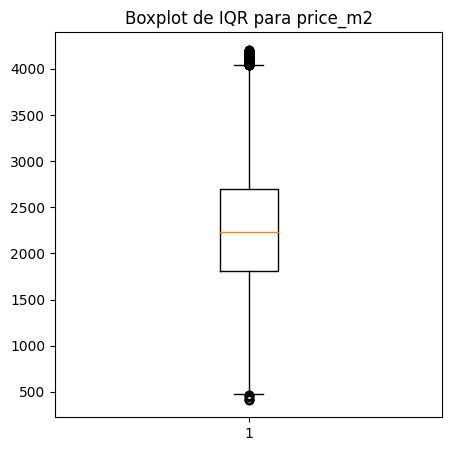

In [194]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3421 registros en train por encima del límite superior en train (4.6836708150217)
Hay 27 registros en train por debajo del límite inferior en train  (0.036965539902246686)
Hay 710 registros en train por encima del límite superior en train (0.9720567900220424)%
Hay 4 registros en train por debajo del límite inferior en train  (0.005476376281814323%)


Text(0.5, 1.0, 'Distribución sin outliers')

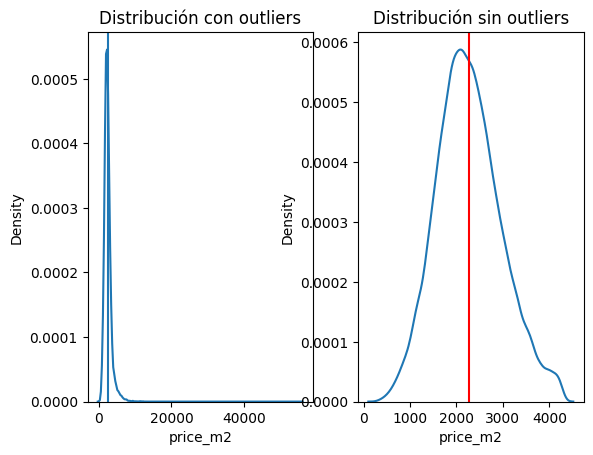

In [195]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

In [196]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3421 registros en train
Se han eliminado: 710 registros en test


In [197]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 27 registros en train
Se han eliminado: 4 registros en test


#### LOF

In [198]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [199]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [200]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

**Analisis de outliers para ambientes y habitaciones**

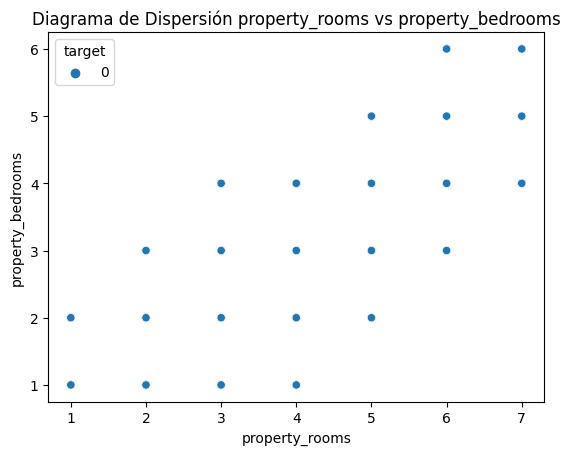

In [201]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [202]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date   end_date    latitud   longitud  \
332847  rPVUO/G5qAkzU2G3JoGb4w== 2021-09-17 2021-11-03 -34.644207 -58.498511   
354335  OtY68BduakKcQqaAGkU7Qw== 2021-11-04 2021-11-12 -34.617285 -58.396332   
25909   AJE6KbG6vKHbaVQsntYXvg== 2021-06-24 2021-10-28 -34.587229 -58.420653   
44150   6x2KFeXEzFzDasGyq/mSCA== 2021-11-23 2021-12-03 -34.621213 -58.432909   
63837   xt+DnMzqxMkpiuKTfy/1iA== 2021-06-22 2022-07-17 -34.562502 -58.453964   
...                          ...        ...        ...        ...        ...   
70148   ktMxvCajVhwVIbsJDNrO2w== 2021-09-23 2021-09-23 -34.595383 -58.380377   
241873  HCmYrGsZa2fIbKh9+m8OSQ== 2021-04-01 2021-04-06 -34.607454 -58.505183   
409028  t3iL6wW7J1TCdpZYYs2f/w== 2021-03-19 2021-11-03 -34.620766 -58.461601   
129107  oUZqmbdiZeqLl2bEp3HX2g== 2021-07-01 2021-07-03 -34.600645 -58.407462   
436686  HsVIgdu7YzJ4vLD92x7JFA== 2021-08-25 2021-08-26 -34.685404 -58.464937   

            place_l3 property_type  property_rooms  property_bedrooms  \
332847     Mataderos            PH             3.0                2.0   
354335     Balvanera  Departamento             1.0                1.0   
25909        Palermo  Departamento             4.0                3.0   
44150      Caballito  Departamento             4.0                3.0   
63837       Belgrano  Departamento             1.0                1.0   
...              ...           ...             ...                ...   
70148       Recoleta  Departamento             7.0                4.0   
241873  Villa Devoto          Casa             4.0                4.0   
409028        Flores            PH             3.0                2.0   
129107     Balvanera  Departamento             1.0                1.0   
436686  Villa Lugano  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
332847                    73.0                      73.0        135000.0   
354335                    43.0                      43.0         59800.0   
25909                    118.0                     118.0        229000.0   
44150                    113.0                     107.0        320000.0   
63837                     24.0                      24.0         60000.0   
...                        ...                       ...             ...   
70148                    231.0                     231.0        350000.0   
241873                   287.0                     255.0        497000.0   
409028                    89.0                      64.0        140000.0   
129107                    44.0                      35.0         66000.0   
436686                    55.0                      55.0         34900.0   

                                           property_title  target  scores  
332847             Excelente Ph 3 amb.- Venta-Barrio Naon       0    -1.0  
354335                           Departamento - Balvanera       0    -1.0  
25909   OPORTUNIDAD IMPECABLE  SEMIPISO DE 118 m2 EN P...       0    -1.0  
44150   Departamento - Caballito - Venta - 4 Ambientes...       0    -1.0  
63837                   Departamento - Belgrano Barrancas       0    -1.0  
...                                                   ...     ...     ...  
70148   Piso de gran categoría en Edificio de estilo f...       0    -1.0  
241873  Venta Casa 4 Amb C/patio, Terraza y Quincho De...       0    -1.0  
409028                                        PH en venta       0    -1.0  
129107  VENTA MONOAMBIENTE CON TERRAZA PROPIA-LUMINOSO !!       0    -1.0  
436686  DEPARTAMENTO 3 AMBIENTES LUGANO 1 Y 2 OPORTUNIDAD       0    -1.0  

[69593 rows x 15 columns]

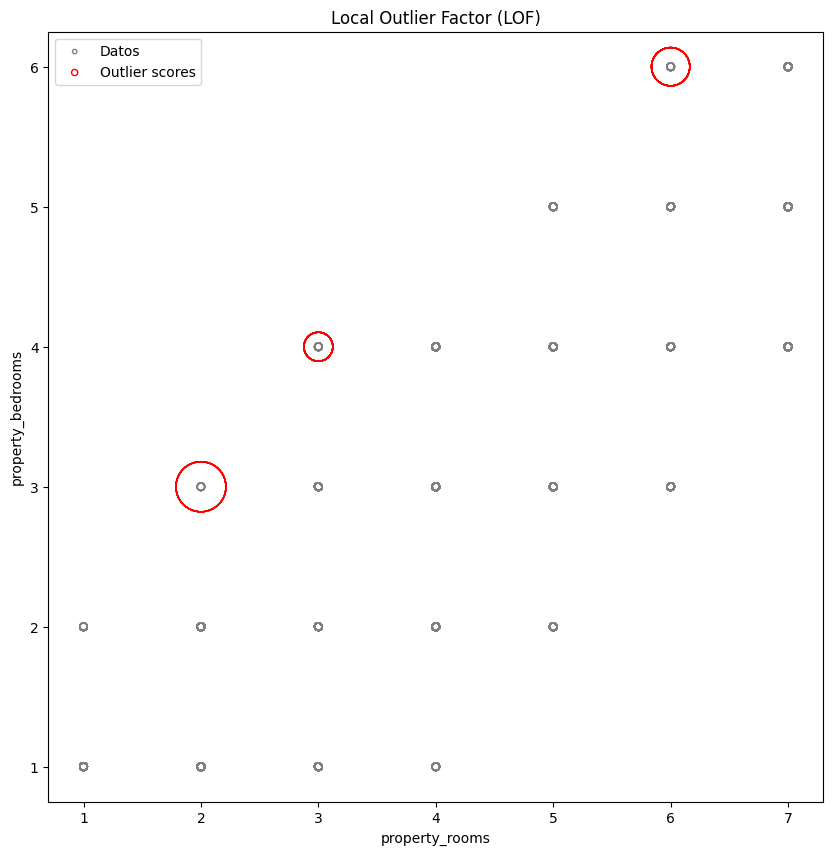

In [203]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

**Analisis de outliers para superficie total y superficie cubierta**

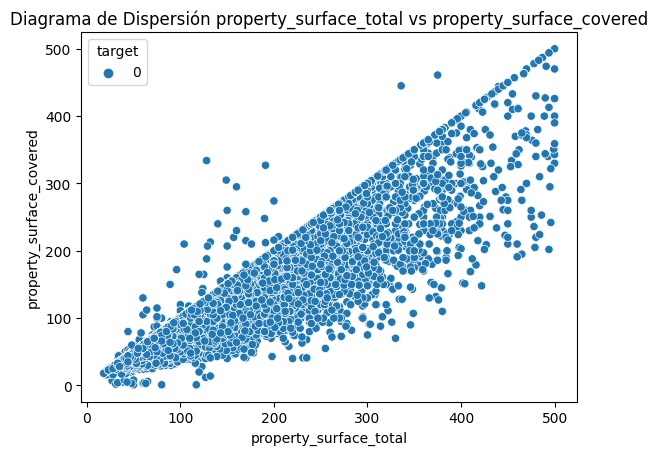

In [204]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [205]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date   end_date    latitud   longitud  \
332847  rPVUO/G5qAkzU2G3JoGb4w== 2021-09-17 2021-11-03 -34.644207 -58.498511   
354335  OtY68BduakKcQqaAGkU7Qw== 2021-11-04 2021-11-12 -34.617285 -58.396332   
25909   AJE6KbG6vKHbaVQsntYXvg== 2021-06-24 2021-10-28 -34.587229 -58.420653   
44150   6x2KFeXEzFzDasGyq/mSCA== 2021-11-23 2021-12-03 -34.621213 -58.432909   
63837   xt+DnMzqxMkpiuKTfy/1iA== 2021-06-22 2022-07-17 -34.562502 -58.453964   
...                          ...        ...        ...        ...        ...   
70148   ktMxvCajVhwVIbsJDNrO2w== 2021-09-23 2021-09-23 -34.595383 -58.380377   
241873  HCmYrGsZa2fIbKh9+m8OSQ== 2021-04-01 2021-04-06 -34.607454 -58.505183   
409028  t3iL6wW7J1TCdpZYYs2f/w== 2021-03-19 2021-11-03 -34.620766 -58.461601   
129107  oUZqmbdiZeqLl2bEp3HX2g== 2021-07-01 2021-07-03 -34.600645 -58.407462   
436686  HsVIgdu7YzJ4vLD92x7JFA== 2021-08-25 2021-08-26 -34.685404 -58.464937   

            place_l3 property_type  property_rooms  property_bedrooms  \
332847     Mataderos            PH             3.0                2.0   
354335     Balvanera  Departamento             1.0                1.0   
25909        Palermo  Departamento             4.0                3.0   
44150      Caballito  Departamento             4.0                3.0   
63837       Belgrano  Departamento             1.0                1.0   
...              ...           ...             ...                ...   
70148       Recoleta  Departamento             7.0                4.0   
241873  Villa Devoto          Casa             4.0                4.0   
409028        Flores            PH             3.0                2.0   
129107     Balvanera  Departamento             1.0                1.0   
436686  Villa Lugano  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
332847                    73.0                      73.0        135000.0   
354335                    43.0                      43.0         59800.0   
25909                    118.0                     118.0        229000.0   
44150                    113.0                     107.0        320000.0   
63837                     24.0                      24.0         60000.0   
...                        ...                       ...             ...   
70148                    231.0                     231.0        350000.0   
241873                   287.0                     255.0        497000.0   
409028                    89.0                      64.0        140000.0   
129107                    44.0                      35.0         66000.0   
436686                    55.0                      55.0         34900.0   

                                           property_title  target  \
332847             Excelente Ph 3 amb.- Venta-Barrio Naon       0   
354335                           Departamento - Balvanera       0   
25909   OPORTUNIDAD IMPECABLE  SEMIPISO DE 118 m2 EN P...       0   
44150   Departamento - Caballito - Venta - 4 Ambientes...       0   
63837                   Departamento - Belgrano Barrancas       0   
...                                                   ...     ...   
70148   Piso de gran categoría en Edificio de estilo f...       0   
241873  Venta Casa 4 Amb C/patio, Terraza y Quincho De...       0   
409028                                        PH en venta       0   
129107  VENTA MONOAMBIENTE CON TERRAZA PROPIA-LUMINOSO !!       0   
436686  DEPARTAMENTO 3 AMBIENTES LUGANO 1 Y 2 OPORTUNIDAD       0   

              scores  
332847 -1.000000e+00  
354335 -1.000000e+00  
25909  -1.000000e+00  
44150  -1.006399e+00  
63837  -1.000000e+00  
...              ...  
70148  -1.050054e+10  
241873 -1.092815e+00  
409028 -1.006089e+00  
129107 -1.000000e+00  
436686 -1.000000e+00  

[69593 rows x 15 columns]

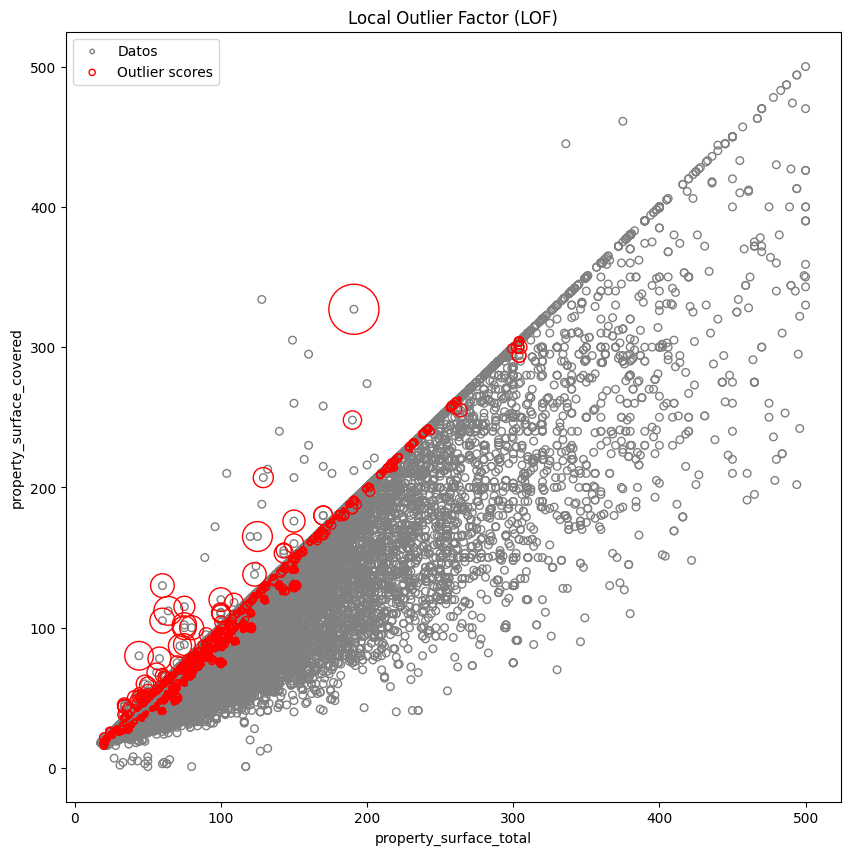

In [206]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

### Reduccion de la Dimensionalidad

#### Analisis PCA

In [207]:
# Train con ID
ds_train_id = ds_train.copy()

# Test con ID
ds_test_id = ds_test.copy()


# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

In [208]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
332847 -34.644207 -58.498511             3.0                2.0   
354335 -34.617285 -58.396332             1.0                1.0   
25909  -34.587229 -58.420653             4.0                3.0   
44150  -34.621213 -58.432909             4.0                3.0   
63837  -34.562502 -58.453964             1.0                1.0   
...           ...        ...             ...                ...   
70148  -34.595383 -58.380377             7.0                4.0   
241873 -34.607454 -58.505183             4.0                4.0   
409028 -34.620766 -58.461601             3.0                2.0   
129107 -34.600645 -58.407462             1.0                1.0   
436686 -34.685404 -58.464937             3.0                2.0   

        property_surface_total  property_surface_covered  
332847                    73.0                      73.0  
354335                    43.0                      43.0  
25909                    118.0                     118.0  
44150                    113.0                     107.0  
63837                     24.0                      24.0  
...                        ...                       ...  
70148                    231.0                     231.0  
241873                   287.0                     255.0  
409028                    89.0                      64.0  
129107                    44.0                      35.0  
436686                    55.0                      55.0  

[69593 rows x 6 columns]

In [209]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.818397 -1.565462        0.222732           0.170933   
1     -0.797019  1.171633       -1.398753          -0.890427   
2      0.343206  0.520140        1.033475           1.232292   
3     -0.946056  0.191833        1.033475           1.232292   
4      1.281286 -0.372173       -1.398753          -0.890427   
...         ...       ...             ...                ...   
69588  0.033891  1.599039        3.465702           2.293652   
69589 -0.424067 -1.744190        1.033475           2.293652   
69590 -0.929083 -0.576748        0.222732           0.170933   
69591 -0.165751  0.873500       -1.398753          -0.890427   
69592 -3.381305 -0.666105        0.222732           0.170933   

       property_surface_total  property_surface_covered  
0                   -0.153136                  0.035508  
1                   -0.644027                 -0.560179  
2                    0.583200                  0.929039  
3                    0.501385                  0.710620  
4                   -0.954925                 -0.937447  
...                       ...                       ...  
69588                2.432223                  3.172793  
69589                3.348552                  3.649342  
69590                0.108672                 -0.143198  
69591               -0.627664                 -0.719028  
69592               -0.447671                 -0.321904  

[69593 rows x 6 columns]

**Replicamos para test las mismas transformaciones**

In [210]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
308204 -34.632666 -58.483515             3.0                2.0   
268298 -34.592577 -58.398797             2.0                1.0   
316898 -34.626402 -58.456731             2.0                1.0   
285674 -34.607440 -58.421899             3.0                2.0   
121034 -34.585663 -58.415008             4.0                2.0   
...           ...        ...             ...                ...   
176400 -34.611851 -58.383438             3.0                2.0   
451234 -34.562502 -58.453964             1.0                1.0   
340400 -34.611979 -58.403334             7.0                5.0   
60319  -34.578861 -58.484033             1.0                1.0   
12502  -34.629900 -58.435900             1.0                1.0   

        property_surface_total  property_surface_covered  
308204                    78.0                      72.0  
268298                    32.0                      27.0  
316898                    40.0                      40.0  
285674                    81.0                      68.0  
121034                    75.0                      75.0  
...                        ...                       ...  
176400                    55.0                      45.0  
451234                    36.0                      36.0  
340400                   364.0                     233.0  
60319                     38.0                      34.0  
12502                     27.0                      27.0  

[16663 rows x 6 columns]

In [211]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test),
                                            columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.492689 -1.212263        0.239653           0.185869   
1      0.115113  1.090312       -0.577649          -0.885802   
2     -1.241470 -0.484306       -0.577649          -0.885802   
3     -0.480978  0.462424        0.239653           0.185869   
4      0.392378  0.649707        1.056954           0.185869   
...         ...       ...             ...                ...   
16658 -0.657886  1.507753        0.239653           0.185869   
16659  1.321279 -0.409101       -1.394950          -0.885802   
16660 -0.663048  0.967010        3.508858           3.400881   
16661  0.665183 -1.226351       -1.394950          -0.885802   
16662 -1.381776  0.081874       -1.394950          -0.885802   

       property_surface_total  property_surface_covered  
0                   -0.063947                  0.029335  
1                   -0.815687                 -0.865123  
2                   -0.684949                 -0.606724  
3                   -0.014920                 -0.050172  
4                   -0.112973                  0.088966  
...                       ...                       ...  
16658               -0.439817                 -0.507340  
16659               -0.750318                 -0.686231  
16660                4.609917                  3.229507  
16661               -0.717634                 -0.725985  
16662               -0.897398                 -0.865123  

[16663 rows x 6 columns]

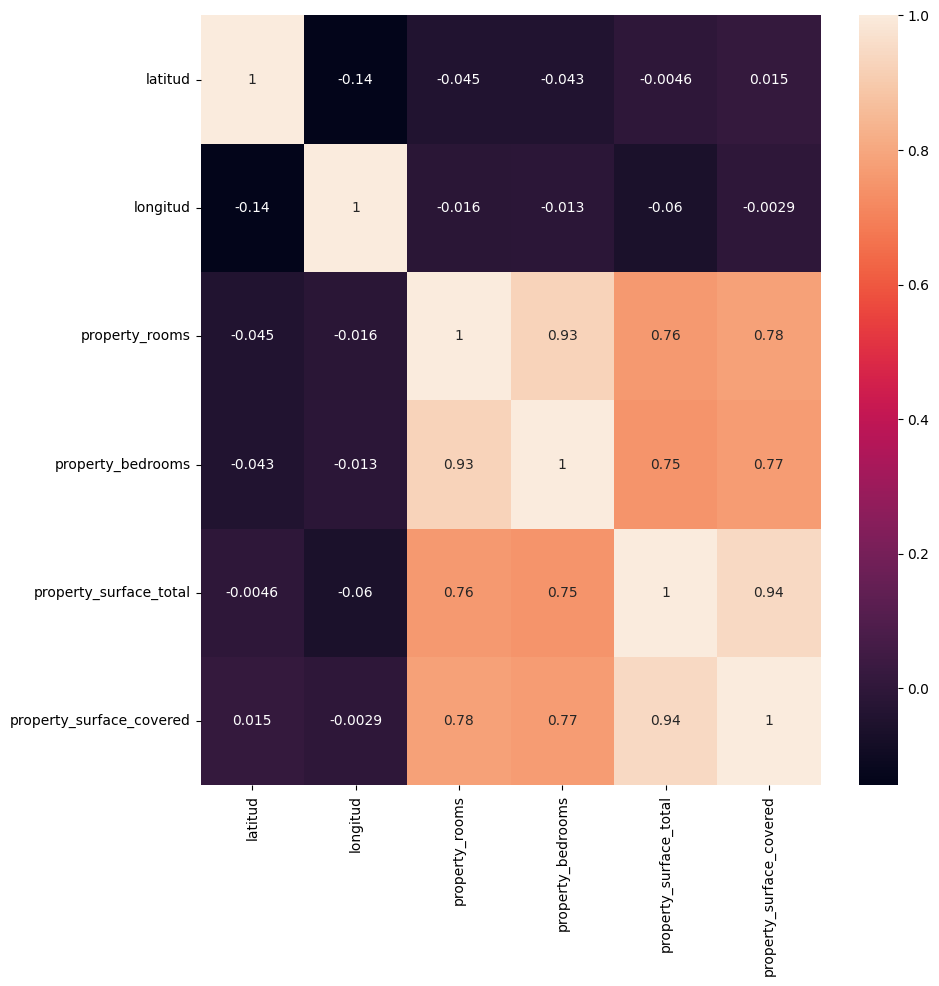

In [212]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

In [213]:
ds_reducido_normalizado.shape

(69593, 6)

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0      0.192348  0.204863  2.388745 -0.135624 -0.031889  0.237273
1     -1.755003  1.351321 -0.262859  0.607511  0.372311  0.054943
2      1.874050  0.155308 -0.645500 -0.417008  0.133444  0.183380
3      1.747883  0.844431  0.506994 -0.464217  0.133418  0.127693
4     -2.102927 -1.185315 -0.599074  0.086813  0.355468  0.014327
...         ...       ...       ...       ...       ...       ...
69588  5.656335  1.126580 -1.304464 -0.075384 -0.814070  0.423085
69589  5.200202 -1.027183  1.315314  1.786365  0.971251  0.346061
69590  0.202205  0.262754  1.075719 -0.138176 -0.039294 -0.138715
69591 -1.830830  0.696988 -0.483250  0.489429  0.366935 -0.073267
69592 -0.127516  1.962805  2.872816 -0.323725 -0.039456  0.177437

[69593 rows x 6 columns]

In [215]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [216]:
varianza_explicada.cumsum()

array([0.57807804, 0.76931177, 0.91223313, 0.97895617, 0.99085532,
       1.        ])

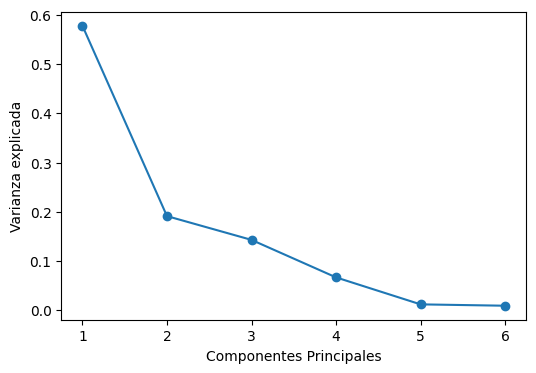

In [217]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

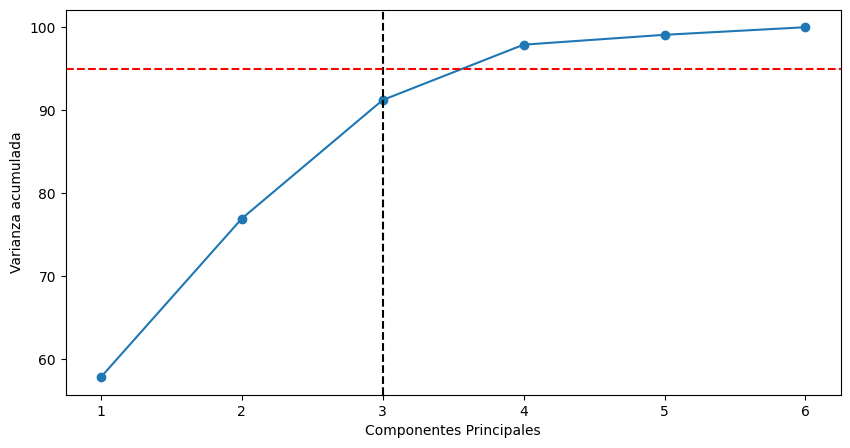

In [218]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [219]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0  0.192348  0.204863  2.388745
1 -1.755003  1.351321 -0.262859
2  1.874050  0.155308 -0.645500
3  1.747883  0.844431  0.506994
4 -2.102927 -1.185315 -0.599074

### Exportamos datasets

In [220]:
ds_test = ds_test.drop(['start_date', 'end_date'], axis=1)

In [221]:
ds_train.to_csv('datasets/tp1-train.csv')
ds_test.to_csv('datasets/tp1-test.csv')


ds_train_id.to_csv('datasets/tp1-train_id.csv')
ds_test_id.to_csv('datasets/tp1-test_id.csv')